## Basic

#### Installation

In [1]:
#!pip install git+https://www.github.com/huggingface/transformers
#!pip install git+https://github.com/huggingface/accelerate
#!pip install bitsandbytes
#!pip install einops
#!pip install --upgrade torch torchvision
#!pip install scikit-learn
#!pip install matplotlib
#!pip install datasets
#!pip install Bio
#!pip install pybedtools
#!pip install tabulate

### Libraries (some in utility_fuction.py)

In [2]:
# Hugging Face Datasets library
from datasets import load_dataset, Dataset

# Scikit-learn for evaluation and data splitting
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Biopython for sequence processing
from Bio import SeqIO

# PyBedTools for genomic interval manipulation
from pybedtools import BedTool

# Data analysis and scientific computation
import pandas as pd
import numpy as np
import scipy.stats as stats

# PyTorch for deep learning
import torch
from torch import nn

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities and external libraries
import os
import pickle
import genopyc
import utility_functions as uf # Custom utility functions for loading models/tokenizers, datasets from the experiments

from concurrent.futures import ThreadPoolExecutor
import time

2025-02-07 10:20:46.144254: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-07 10:20:46.144317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-07 10:20:46.145411: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-07 10:20:46.156323: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-07 10:20:48.739688: W tensorflow/compiler/tf2

## Dataset Mutagenesis

#### Load experiment dataset

In [3]:
data_to_source = pd.read_csv('/data/Dcode/gaetano/repos/AI4Genomic/data/data_mutagenesis_curated.csv')
data_to_source

,name,path,hg type,#samples,cell line,study,resource,BioS,type_data
0,k562.sign.id.LP190708.txt,/data/Dcode/gaetano/repos/AI4Genomic/data/raQT...,hg19,19237,k562,PMID: 31253979,https://osf.io/6y9td/,BioS74,raQTL
1,hepg2.sign.id.LP190708.txt,/data/Dcode/gaetano/repos/AI4Genomic/data/raQT...,hg19,14183,hepg2,PMID: 31253979,https://osf.io/6y9td/,BioS73,raQTL
2,SORT1.csv,/data/Dcode/gaetano/repos/AI4Genomic/data/mpra...,hg38,1789,hepg2,PMID: 31395865,https://pavlopoulos-lab.org/shinyapps/app/mpra...,BioS73,mpra
3,GSE87711.csv,/data/Dcode/gaetano/repos/AI4Genomic/data/mpra...,hg19,84,k562,PMID: 27259154,paper Sup. Mat.,BioS74,mpra
4,GSE68331_SNP.csv,/data/Dcode/gaetano/repos/AI4Genomic/data/mpra...,hg19,283,hepg2,PMID: 26084464,paper Sup. Mat.,BioS73,mpra
5,NPC_SNP.csv,/data/Dcode/gaetano/repos/AI4Genomic/data/mpra...,hg19,14042,NPC,PMID: 33885362,paper Sup. Mat.,BioS45,mpra
6,Hela_TRAF3IP2.csv,/data/Dcode/gaetano/repos/AI4Genomic/data/mpra...,hg19,1962,Hela,PMID: 25340400,paper Sup. Mat.,BioS2,mpra
7,Hela_PPARG.csv,/data/Dcode/gaetano/repos/AI4Genomic/data/mpra...,hg19,1614,Hela,PMID: 25340400,paper Sup. Mat.,BioS2,mpra
8,Hela_SORL1.csv,/data/Dcode/gaetano/repos/AI4Genomic/data/mpra...,hg19,1665,Hela,PMID: 25340400,paper Sup. Mat.,BioS2,mpra


### preprocess experimental dataset

In [4]:
idx = 1
data_ = data_to_source.iloc[idx]

# extract from dataset
dataset_df = uf.data_preprocessing_experimental_result(data_['type_data'], data_['name'], data_['path'])
print(data_['type_data'], data_['name'])
dataset_df

raQTL hepg2.sign.id.LP190708.txt


/data/Dcode/gaetano/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Chromosome,Position,Reference,Alternative,SNP_id,Value_Ratio,Value_Diff,Value_Ratio_log2,Value_Pvalue_signed,P_value
0,chr3,24362252,A,G,rs9814223,22.967045,34.702011,4.521493,39.298515,5.029041e-40
1,chr4,59436721,T,C,rs1605769,10.555441,13.601881,3.399915,35.605309,2.481365e-36
2,chr5,54253581,A,G,rs3815923,0.071947,-12.461018,-3.796916,-35.227522,5.922130e-36
3,chr9,88698591,C,A,rs1928227,14.642079,10.962843,3.872049,34.837753,1.452938e-35
4,chr14,89393045,G,A,rs7156067,0.053868,-14.728486,-4.214426,-34.683354,2.073221e-35
...,...,...,...,...,...,...,...,...,...,...
14178,chr22,39493251,T,A,rs41281251,0.509928,-11.933327,-0.971633,-2.762209,1.728983e-03
14179,chr1,201987924,C,T,rs80059802,0.533668,-2.211725,-0.905986,-2.762030,1.729699e-03
14180,chr2,122050796,G,A,rs934939,1.934232,6.365521,0.951761,2.761880,1.730296e-03
14181,chr11,21053752,C,G,rs4923282,1.198240,1.426730,0.260917,2.761710,1.730972e-03


## LD data

#### open dict of LDs  

In [5]:
## open pickle 
with open(f"/data/Dcode/gaetano/repos/AI4Genomic/data/ld/ld_{data_['name']}.pkl", "rb") as pickle_file:
    ld_dict = pickle.load(pickle_file)

print(f"Loaded LD dictionary for {data_['name']}")

Loaded LD dictionary for hepg2.sign.id.LP190708.txt


#### open LD dataframe

In [6]:
## load dataframe 
with open(f"/data/Dcode/gaetano/repos/AI4Genomic/data/ld/ld_df_{data_['name']}.pkl", "rb") as pickle_file:
    df = pickle.load(pickle_file)

print(f"Loaded LD dataframe for {data_['name']}")

# cleaning 
condition = (df['Chromosome']!='chrHSCHR22_1_CTG7') & (df['Chromosome']!='chrHSCHR11_3_CTG1') & (df['Chromosome']!='chrHG1651_PATCH')
df_filtered = df[condition]

# save
df_filtered.to_csv(f'/data/Dcode/gaetano/repos/AI4Genomic/data/ld/ld_df_hepg2.sign.id.LP190708.txt.csv', index=False)

Loaded LD dataframe for hepg2.sign.id.LP190708.txt


#### get list of no - overlapped causal SNPs

In [7]:
# get causal snps
candidate_snps_df = df_filtered
causal_snp_set = set(candidate_snps_df['SNP_id_candidate'])

# get ld snps
ld_snps_df = candidate_snps_df[['SNP_id_candidate', 'SNP_id']]

# get overlap
def get_non_overlapping_snps(causal_snps, ld_snps):
    overlapping_snps = set()
    for snp in causal_snps:
        ld_snps_for_snp = set(ld_snps[ld_snps['SNP_id_candidate'] == snp]['SNP_id'])
        overlapping_snps.update(ld_snps_for_snp.intersection(causal_snps))
    return [snp for snp in causal_snps if snp not in overlapping_snps]

causal_snp_list_no_overlaps = get_non_overlapping_snps(causal_snp_set, ld_snps_df)

In [8]:
#causal_snp_list = list(causal_snp_set)
#
#from concurrent.futures import ThreadPoolExecutor, as_completed
#
## Function to process a single SNP candidate
#def process_snp_candidate(snp_candidate):
#    local_data = []
#    try:
#        # Fetch variant information
#        list_snps = snp_candidate
#        info_ld = genopyc.get_variants_info(list_snps, chunked=False, chunksize=200)
#        
#        # Extract and filter relevant data
#        for snp_id, snp_info in info_ld.items():
#            mappings = snp_info.get('mappings', [])
#            if not mappings:
#                continue
#
#            allele_string = mappings[0].get('allele_string', '')
#            location = mappings[0].get('location', '')
#            if not allele_string or not location:
#                continue
#
#            # Parse alleles and position
#            alleles = allele_string.split('/')
#            pos = location.split(':')
#
#
#            chromosome = f"chr{pos[0]}"
#            position = int(pos[1].split('-')[0])
#            
#          
#            local_data.append([chromosome, position, snp_id])
#    except Exception as e:
#        print(f"Error processing {snp_candidate}: {e}")
#    return local_data
#
#causal_snp_position = process_snp_candidate(causal_snp_list)

In [9]:
## save causal_snp_position
#with open(f"/data/Dcode/gaetano/repos/AI4Genomic/data/ld/causal_snp_hg38_position_{data_['name']}.pkl", "wb") as pickle_file:
#    pickle.dump(causal_snp_position, pickle_file)   

### Load LD prediction

In [10]:
## load ld prediction transformer models
with open(f"/data/Dcode/gaetano/repos/AI4Genomic/data/predictions/transformer_ld_predictions_{data_['name']}.pkl", "rb") as pickle_file:
    models_predictions = pickle.load(pickle_file)

## load ld prediction trednet repos/AI4Genomic/data/predictions/trednet_LD_hepg2.pkl 
with open(f"/data/Dcode/gaetano/repos/AI4Genomic/data/predictions/trednet_LD_{data_['name']}.pkl", "rb") as pickle_file:
    trednet_predictions = pickle.load(pickle_file,encoding='latin1')

## load ld prediction enformer repos/AI4Genomic/data/predictions/enformer_LD_hepg2.sign.id.LP190708.txt.pkl 
with open(f"/data/Dcode/gaetano/repos/AI4Genomic/data/predictions/enformer_LD_{data_['name']}.pkl", "rb") as pickle_file:
    enformer_predictions = pickle.load(pickle_file,encoding='latin1')

## load ld prediction sei /data/Dcode/gaetano/CNNplusModels/sei-framework/sei_pred_hepg2.sign.id.LP190708.txt.pkl 
with open(f"/data/Dcode/gaetano/repos/AI4Genomic/data/predictions/sei_pred_{data_['name']}.pkl", "rb") as pickle_file:
    sei_predictions = pickle.load(pickle_file,encoding='latin1')

# Initialize borzoi_predictions dictionary
borzoi_predictions = {
    'diff': np.array([]),
    'diff_ratio': np.array([])
}

# Define the base path and filename format
base_path = "/data/Dcode/gaetano/CNNplusModels/baskerville/borzoi/examples/borzoi_models_sample/results"
filename_format = "borzoi_LD_hepg2.sign.id.LP190708.txt_{idx}_predictions.pkl"

# Load and process predictions for indices 1 to 10
for idx in range(1, 11):
    file_path = f"{base_path}/{filename_format.format(idx=idx)}"
    with open(file_path, "rb") as pickle_file:
        diff_ratio_predictions = pickle.load(pickle_file, encoding='latin1')
        borzoi_predictions['diff'] = np.append(borzoi_predictions['diff'], diff_ratio_predictions['diff'])
        borzoi_predictions['diff_ratio'] = np.append(borzoi_predictions['diff_ratio'], diff_ratio_predictions['diff_ratio'])
        
## add predictions to models_predictions    
models_predictions['trednet_ft_BioS73'] = trednet_predictions
models_predictions['enformer_ft_BioS73'] = enformer_predictions 
models_predictions['sei_ft_BioS73'] = sei_predictions
models_predictions['borzoi_ft_BioS73'] = borzoi_predictions

print(f"Loaded LD predictions for {data_['name']}")

Loaded LD predictions for hepg2.sign.id.LP190708.txt


### calculate log2 fold change prediction for assosiated snps (r2>0.8)

In [11]:
def calculate_logit_ratio(ref_predictions, alt_predictions):
    """Calculate the log2 ratio of alt and ref probabilities using the sigmoid function."""
    ref_margin_logit = ref_predictions[:, 1] - ref_predictions[:, 0]
    alt_margin_logit = alt_predictions[:, 1] - alt_predictions[:, 0]

    ref_probability = 1 / (1 + np.exp(-ref_margin_logit))
    alt_probability = 1 / (1 + np.exp(-alt_margin_logit))

    return np.log2((alt_probability / ref_probability).numpy())

### Log2 prediction for assosiated SNPs

In [12]:
candidate_snps = df['SNP_id_candidate'].value_counts()
snp_cand_dict = {}

# Iterate through models
for model_version in models_predictions.keys():
    # Initialize starting index for each model
    start_idx = 0
    
    for snp_cand_id, snp_cand_count in candidate_snps.items():
        end_idx = start_idx + snp_cand_count  # Calculate end index
        
        # Initialize the SNP candidate entry if it doesn't exist
        if snp_cand_id not in snp_cand_dict:
            snp_cand_dict[snp_cand_id] = {}
        
        # Initialize the model_version dictionary for this SNP candidate
        if model_version not in snp_cand_dict[snp_cand_id]:
            snp_cand_dict[snp_cand_id][model_version] = {}
        
        # Slice predictions for 'ref' and 'alt'
        if 'trednet' in model_version: 
            ref_probability =  trednet_predictions['predictions_ref'][start_idx:end_idx]
            alt_probability =  trednet_predictions['predictions_alt'][start_idx:end_idx]
            snp_cand_dict[snp_cand_id][model_version] = {
            'ref': ref_probability,
            'alt': alt_probability,
            }
            snp_cand_dict[snp_cand_id][model_version]['log2_ratio'] = np.log2(np.squeeze(alt_probability / ref_probability))
        elif 'enformer' in model_version:
            snp_cand_dict[snp_cand_id][model_version] = {
            'log2_ratio': np.log2(enformer_predictions['diff_ratio'][start_idx:end_idx]),
            }
        elif 'sei' in model_version:
            snp_cand_dict[snp_cand_id][model_version] = {
            'log2_ratio': np.log2(sei_predictions['diff_ratio'][start_idx:end_idx]),
            }
        elif 'borzoi' in model_version:
            snp_cand_dict[snp_cand_id][model_version] = {
            'log2_ratio': np.log2(sei_predictions['diff_ratio'][start_idx:end_idx]),
            }
        else:    
       
            snp_cand_dict[snp_cand_id][model_version] = {
                'ref': models_predictions[model_version]['ref'][start_idx:end_idx],
                'alt': models_predictions[model_version]['alt'][start_idx:end_idx],
            }
            
            snp_cand_dict[snp_cand_id][model_version]['log2_ratio'] = calculate_logit_ratio(snp_cand_dict[snp_cand_id][model_version]['ref'], snp_cand_dict[snp_cand_id][model_version]['alt'])  
        
        # Update the starting index for the next SNP candidate
        start_idx = end_idx

### Load casual snps predictions in log2 fold-change

In [13]:
def load_pickle_predictions(file_path):
    """Load a pickle file and return its contents."""
    with open(file_path, 'rb') as file:
        return pickle.load(file, encoding='latin1')

def get_model_predictions(data, models_to_add, data_name):
    """Generate model predictions from data, including additional models."""
    model_predictions = {}

    # Process existing models
    for model, values in data.items():
        model_name = model.split('_')[0]
        model_predictions[model_name] = {
            'Value_Ratio_log2': calculate_logit_ratio(values['ref'], values['alt'])
        }

    # Add external models
    for model_name in models_to_add:
        path_model_pred = f'/data/Dcode/gaetano/repos/AI4Genomic/data/predictions/{model_name}_{data_name}.pkl'
        external_data = load_pickle_predictions(path_model_pred)

        if 'tred' in model_name:
            external_data['diff_ratio'] = np.squeeze(external_data['predictions_alt'] / external_data['predictions_ref'])
        
        diff_ratio = external_data.get('diff_ratio', [])
        if not isinstance(diff_ratio, np.ndarray):
            diff_ratio = np.array(diff_ratio)

        model_predictions[model_name] = {
            'Value_Ratio_log2': np.log2(diff_ratio)
        }

    return model_predictions

def get_prediction_ratio_per_experiment(data_to_source):
    """Main function to compute prediction ratios for each experiment."""
    dict_results_per_experiment = {}

    for index, row in data_to_source.iterrows():
        data_name = row['name']
        dataset_path = row['path']
        type_data = row['type_data']

        # Preprocess data and load model predictions
        data_df = uf.data_preprocessing_experimental_result(type_data, data_name, dataset_path)
        file_path = f'/data/Dcode/gaetano/repos/AI4Genomic/data/predictions/{data_name}.pkl'
        data = load_pickle_predictions(file_path)

        # Get all model predictions
        models_to_add = ['trednet', 'sei', 'enformer', 'borzoi']
        model_predictions = get_model_predictions(data, models_to_add, data_name)
        dict_results_per_experiment[index] = model_predictions

    return dict_results_per_experiment

dict_results_per_experiment = get_prediction_ratio_per_experiment(data_to_source)

/data/Dcode/gaetano/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/Dcode/gaetano/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/Dcode/gaetano/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/Dcode/gaetano/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/Dcode/gaetano/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/Dcode/gaetano/venv/lib/python3.10/site-packages/pan

In [14]:
#model_to_casual_snp = {}
#
#for model_to_check in list(dict_results_per_experiment[0].keys()):
#    val_no_ld = 0
#    val_ld_casual = 0
#    top_1 = 0
#    top_2 = 0
#    top_3 = 0
#    top_5 = 0
#    for cas_snp in snp_cand_dict.keys():
#        # Get the experiment log2 values for the current SNP
#        experiment_log2 = dataset_df[dataset_df['SNP_id'] == cas_snp]['Value_Ratio']
#
#
#        # Extract the log2 values for the casual SNP from the ndarray (assuming it's an array)
#        casual_snp_log2 = dict_results_per_experiment[1][model_to_check]['Value_Ratio_log2']
#
#        # Ensure experiment_log2.index corresponds to valid indices in the casual_snp_log2 array
#        # If experiment_log2.index is not a simple integer index, convert it to a positional index.
#        # We assume experiment_log2.index contains the row positions from the original dataframe.
#
#        try:
#            index_positions = np.isin(np.arange(len(casual_snp_log2)), experiment_log2.index)
#        except AttributeError:
#            # If experiment_log2.index is not present, default to checking the index directly
#            index_positions = np.isin(np.arange(len(casual_snp_log2)), list(experiment_log2.index))
#
#        # Ensure that the boolean indexing matches the casual_snp_log2 array length
#        if sum(index_positions) == 0:
#            print(f"Warning: No matching indices found for SNP {cas_snp} in experiment_log2")
#            continue  # Skip this SNP if no matching indices are found
#
#        # Get the values from casual_snp_log2 at the corresponding positions
#        casual_snp_log2_value = casual_snp_log2[index_positions]
#
#        # Check if we have multiple log2 values or just one for the casual SNP
#        if len(casual_snp_log2_value) > 1:
#            casual_snp_log2_value = casual_snp_log2_value[0]  # Assuming you need only one value
#
#        # Extract associated SNP log2 values from the dictionary
#        associated_snps_log2 = snp_cand_dict[cas_snp].get(f'{model_to_check}_ft_BioS73', {}).get('log2_ratio', [])
#
#        # If associated_snps_log2 is a scalar (single value)
#        if isinstance(associated_snps_log2, (int, float, np.float32, np.float64)):
#            associated_snps_log2 = [associated_snps_log2]  # Convert scalar to list for uniformity
#
#        # Now, associated_snps_log2 should always be a list or an array
#        if len(associated_snps_log2) == 0:
#            val_no_ld += 1
#            continue
#        
#        # Check if casual SNP log2 value is outside the range of the associated SNP log2 values
#        elif casual_snp_log2_value > max(associated_snps_log2) or casual_snp_log2_value < min(associated_snps_log2):
#            val_ld_casual += 1
#        
#        # Top checks
#        value = casual_snp_log2_value
#        sorted_tmp = np.sort(associated_snps_log2)
#        top_1 = top_1 + int(value >= sorted_tmp[-1] or value <= sorted_tmp[0])
#        top_2 = top_2 + int(len(sorted_tmp) > 2 and (value >= sorted_tmp[-2] or value <= sorted_tmp[1]))
#        top_3 = top_3 + int(len(sorted_tmp) > 3 and (value >= sorted_tmp[-3] or value <= sorted_tmp[2]))
#        top_5 = top_5 + int(len(sorted_tmp) > 5 and (value >= sorted_tmp[-5] or value <= sorted_tmp[4]))
#
#    if model_to_check not in model_to_casual_snp:
#        model_to_casual_snp[model_to_check] = {'top_1': 0, 'top_2': 0, 'top_3': 0}
#
#    model_to_casual_snp[model_to_check]['top_1'] = top_1 
#    model_to_casual_snp[model_to_check]['top_2'] = top_2
#    model_to_casual_snp[model_to_check]['top_3'] = top_3
#    
#    print(f"Model: {model_to_check}")
#    print(f"Number of SNPs without LD: {val_no_ld}")
#    print(f"Number of SNPs with LD: {val_ld_casual}")
#    

In [15]:
#model_to_casual_snp_no_overlap = {}
#
#for model_to_check in list(dict_results_per_experiment[0].keys()):
#    val_no_ld = 0
#    val_ld_casual = 0
#    top_1 = 0
#    top_2 = 0
#    top_3 = 0
#    top_5 = 0
#    for cas_snp in causal_snp_list_no_overlaps:
#        # Get the experiment log2 values for the current SNP
#        experiment_log2 = dataset_df[dataset_df['SNP_id'] == cas_snp]['Value_Ratio']
#
#
#        # Extract the log2 values for the casual SNP from the ndarray (assuming it's an array)
#        casual_snp_log2 = dict_results_per_experiment[1][model_to_check]['Value_Ratio_log2']
#
#        # Ensure experiment_log2.index corresponds to valid indices in the casual_snp_log2 array
#        # If experiment_log2.index is not a simple integer index, convert it to a positional index.
#        # We assume experiment_log2.index contains the row positions from the original dataframe.
#
#        try:
#            index_positions = np.isin(np.arange(len(casual_snp_log2)), experiment_log2.index)
#        except AttributeError:
#            # If experiment_log2.index is not present, default to checking the index directly
#            index_positions = np.isin(np.arange(len(casual_snp_log2)), list(experiment_log2.index))
#
#        # Ensure that the boolean indexing matches the casual_snp_log2 array length
#        if sum(index_positions) == 0:
#            print(f"Warning: No matching indices found for SNP {cas_snp} in experiment_log2")
#            continue  # Skip this SNP if no matching indices are found
#
#        # Get the values from casual_snp_log2 at the corresponding positions
#        casual_snp_log2_value = casual_snp_log2[index_positions]
#
#        # Check if we have multiple log2 values or just one for the casual SNP
#        if len(casual_snp_log2_value) > 1:
#            casual_snp_log2_value = casual_snp_log2_value[0]  # Assuming you need only one value
#
#        # Extract associated SNP log2 values from the dictionary
#        associated_snps_log2 = snp_cand_dict[cas_snp].get(f'{model_to_check}_ft_BioS73', {}).get('log2_ratio', [])
#
#        # If associated_snps_log2 is a scalar (single value)
#        if isinstance(associated_snps_log2, (int, float, np.float32, np.float64)):
#            associated_snps_log2 = [associated_snps_log2]  # Convert scalar to list for uniformity
#
#        # Now, associated_snps_log2 should always be a list or an array
#        if len(associated_snps_log2) == 0:
#            val_no_ld += 1
#            continue
#        
#        # Check if casual SNP log2 value is outside the range of the associated SNP log2 values
#        elif casual_snp_log2_value > max(associated_snps_log2) or casual_snp_log2_value < min(associated_snps_log2):
#            val_ld_casual += 1
#        
#        # Top checks
#        value = casual_snp_log2_value
#        sorted_tmp = np.sort(associated_snps_log2)
#        top_1 = top_1 + int(value >= sorted_tmp[-1] or value <= sorted_tmp[0])
#        top_2 = top_2 + int(len(sorted_tmp) > 2 and (value >= sorted_tmp[-2] or value <= sorted_tmp[1]))
#        top_3 = top_3 + int(len(sorted_tmp) > 3 and (value >= sorted_tmp[-3] or value <= sorted_tmp[2]))
#        top_5 = top_5 + int(len(sorted_tmp) > 5 and (value >= sorted_tmp[-5] or value <= sorted_tmp[4]))
#
#    if model_to_check not in model_to_casual_snp_no_overlap:
#        model_to_casual_snp_no_overlap[model_to_check] = {'top_1': 0, 'top_2': 0, 'top_3': 0}
#
#    model_to_casual_snp_no_overlap[model_to_check]['top_1'] = top_1
#    model_to_casual_snp_no_overlap[model_to_check]['top_2'] = top_2 
#    model_to_casual_snp_no_overlap[model_to_check]['top_3'] = top_3
#    
#    
#    print(f"Model: {model_to_check}")
#    print(f"Number of SNPs without LD: {val_no_ld}")
#    print(f"Number of SNPs with LD: {val_ld_casual}")
    

In [16]:
## save model_to_casual_snp as pickle
#with open(f"/data/Dcode/gaetano/repos/AI4Genomic/data/predictions/model_to_casual_snp_{data_['name']}.pkl", "wb") as pickle_file:
#    pickle.dump(model_to_casual_snp, pickle_file)
    
## save model_to_casual_snp as pickle
#with open(f"/data/Dcode/gaetano/repos/AI4Genomic/data/predictions/model_to_casual_snp_no_overlap{data_['name']}.pkl", "wb") as pickle_file:
#    pickle.dump(model_to_casual_snp_no_overlap, pickle_file)      

## Top 3 causal SNPs in the LD block

#### load data

In [17]:
## open model_to_casual_snp as pickle
with open(f"/data/Dcode/gaetano/repos/AI4Genomic/data/predictions/model_to_casual_snp_{data_['name']}.pkl", "rb") as pickle_file:
    model_to_casual_snp = pickle.load(pickle_file)
    
## open model_to_casual_snp as pickle
with open(f"/data/Dcode/gaetano/repos/AI4Genomic/data/predictions/model_to_casual_snp_no_overlap{data_['name']}.pkl", "rb") as pickle_file:
    model_to_casual_snp_no_overlap = pickle.load(pickle_file)
    
    

#### plot data

/tmp/ipykernel_2406829/4130006993.py:89: FutureWarning: The provided callable <function sum at 0x155533fdcca0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_pivot = df.pivot_table(index='Model Name', columns='Metric', values='Percentage', aggfunc=np.sum).fillna(0)


Geneformer
hyenadna-medium-160k-seqlen-hf
hyenadna-small-32k-seqlen-hf
hyenadna-medium-450k-seqlen-hf
hyenadna-large-1m-seqlen-hf
dnabert2
nucleotide-transformer-500m-human-ref
nucleotide-transformer-2.5b-1000g
nucleotide-transformer-2.5b-multi-species
gena-lm-bert-base-t2t
gena-lm-bert-large-t2t
nucleotide-transformer-v2-250m-multi-species
nucleotide-transformer-v2-500m-multi-species
gena-lm-bigbird-base-t2t
nucleotide-transformer-v2-100m-multi-species
nucleotide-transformer-500m-1000g
nucleotide-transformer-v2-50m-multi-species
gena-lm-bert-base-t2t-multi
trednet
enformer
sei
borzoi


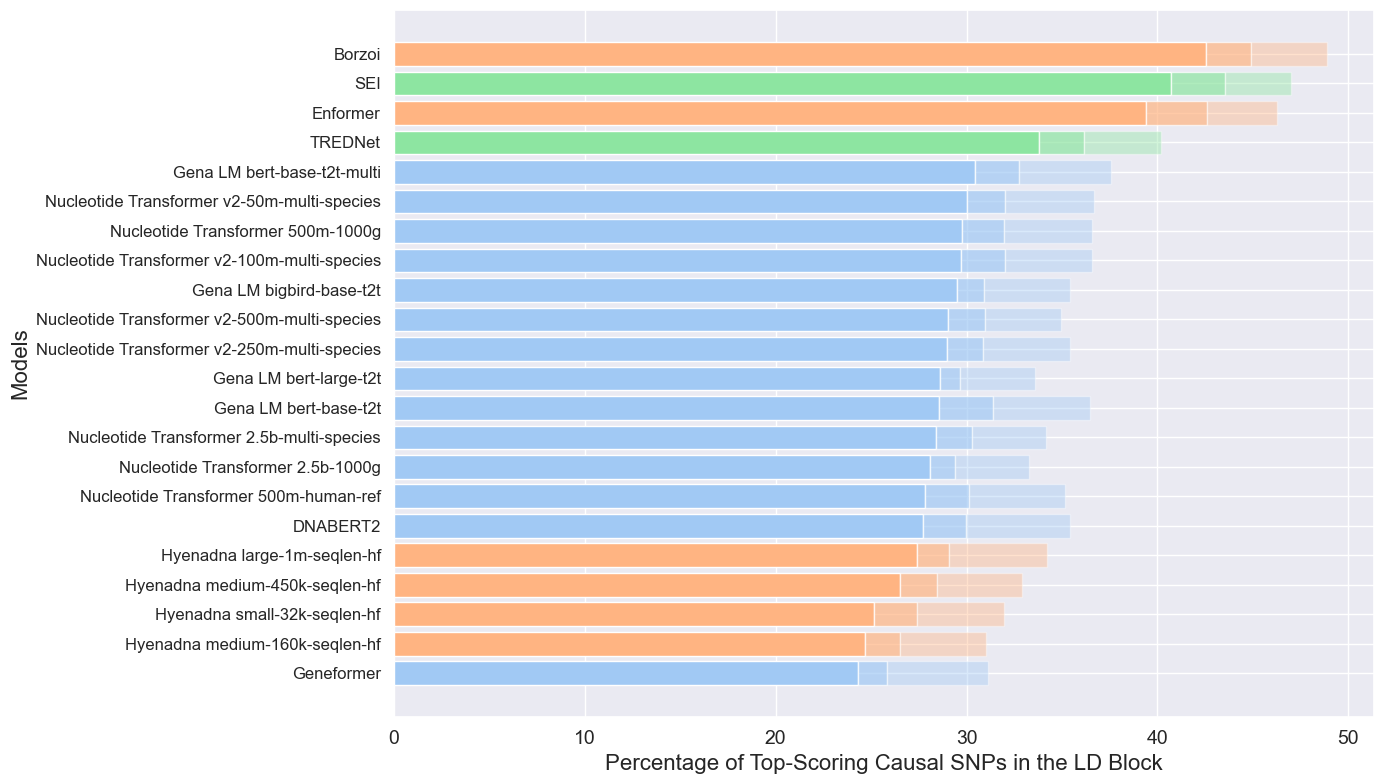

In [18]:
sns.set()
# Architecture mapping
architecture_mapping = {
    'dnabert2': 'Transformer',
    'nucleotide-transformer-v2-50m-multi-species': 'Transformer',
    'nucleotide-transformer-v2-100m-multi-species': 'Transformer',
    'nucleotide-transformer-v2-250m-multi-species': 'Transformer',
    'nucleotide-transformer-v2-500m-multi-species': 'Transformer',
    'nucleotide-transformer-500m-1000g': 'Transformer',
    'nucleotide-transformer-500m-human-ref': 'Transformer',
    'nucleotide-transformer-2.5b-1000g': 'Transformer',
    'nucleotide-transformer-2.5b-multi-species': 'Transformer',
    'Geneformer': 'Transformer',
    'gena-lm-bert-base-t2t': 'Transformer',
    'gena-lm-bert-large-t2t': 'Transformer',
    'gena-lm-bert-base-t2t-multi': 'Transformer',
    'gena-lm-bigbird-base-t2t': 'Transformer',
    'hyenadna-small-32k-seqlen-hf': 'Hybrid',
    'hyenadna-medium-160k-seqlen-hf': 'Hybrid',
    'hyenadna-medium-450k-seqlen-hf': 'Hybrid',
    'hyenadna-large-1m-seqlen-hf': 'Hybrid',
    'trednet': 'CNN',
    'sei': 'CNN',
    'enformer': 'Hybrid',
    'borzoi': 'Hybrid',
}

# Seaborn pastel color palette
palette = sns.color_palette("pastel", n_colors=len(set(architecture_mapping.values())))


# Color mapping based on architectures (using Set2 palette)
architecture_colors = {
    'Transformer': palette[0],  # First color for Transformer
    'Hybrid': palette[1],       # Second color for Hybrid
    'CNN': palette[2],          # Third color for CNN
}

# Normalize the values as percentage of the top value
data = model_to_casual_snp  # Assuming this contains model data

top_value = len(snp_cand_dict.keys())  # Assuming this is your dataset with causal SNP data
normalized_data = {
    model: {metric: (value[metric] / top_value) * 100 for metric in ['top_1', 'top_2', 'top_3']}
    for model, value in data.items()
}

# Convert the normalized data to a DataFrame
df = pd.DataFrame([
    {'Model': model, 'Metric': metric, 'Percentage': percentage, 'Architecture': architecture_mapping.get(model, 'Unknown')}
    for model, metrics in normalized_data.items()
    for metric, percentage in metrics.items()
])

# Architecture mapping for model names
architecture_mapping_models = {
    'dnabert2': 'DNABERT2',
    'nucleotide-transformer-v2-50m-multi-species':  'Nucleotide Transformer v2-50m-multi-species',
    'nucleotide-transformer-v2-100m-multi-species': 'Nucleotide Transformer v2-100m-multi-species',
    'nucleotide-transformer-v2-250m-multi-species': 'Nucleotide Transformer v2-250m-multi-species',
    'nucleotide-transformer-v2-500m-multi-species': 'Nucleotide Transformer v2-500m-multi-species',
    'nucleotide-transformer-500m-1000g':            'Nucleotide Transformer 500m-1000g',
    'nucleotide-transformer-500m-human-ref':        'Nucleotide Transformer 500m-human-ref',
    'nucleotide-transformer-2.5b-1000g':            'Nucleotide Transformer 2.5b-1000g',
    'nucleotide-transformer-2.5b-multi-species':    'Nucleotide Transformer 2.5b-multi-species',
    'Geneformer': 'Geneformer',
    'gena-lm-bert-base-t2t':        'Gena LM bert-base-t2t',
    'gena-lm-bert-large-t2t':       'Gena LM bert-large-t2t',
    'gena-lm-bert-base-t2t-multi':  'Gena LM bert-base-t2t-multi',
    'gena-lm-bigbird-base-t2t':     'Gena LM bigbird-base-t2t',
    'hyenadna-small-32k-seqlen-hf':   'Hyenadna small-32k-seqlen-hf',
    'hyenadna-medium-160k-seqlen-hf': 'Hyenadna medium-160k-seqlen-hf',
    'hyenadna-medium-450k-seqlen-hf': 'Hyenadna medium-450k-seqlen-hf',
    'hyenadna-large-1m-seqlen-hf':    'Hyenadna large-1m-seqlen-hf',
    'trednet': 'TREDNet',
    'sei': 'SEI',
    'enformer': 'Enformer',
    'borzoi': 'Borzoi',
}

# Add human-readable names for models (ensure architecture_mapping_models exists)
df['Model Name'] = df['Model']

# Sort the data by top_1 percentage for better comparison (ascending order)
df_sorted = df[df['Metric'] == 'top_1'].sort_values(by='Percentage', ascending=True)
order = df_sorted['Model'].tolist()

# Create a pivot table for stacked bars
df_pivot = df.pivot_table(index='Model Name', columns='Metric', values='Percentage', aggfunc=np.sum).fillna(0)


# Reorder the pivot table based on top_1 (ascending order)
df_pivot = df_pivot.loc[df_pivot['top_1'].sort_values(ascending=True).index]

# Create the plot with horizontal stacked bars
fig, ax = plt.subplots(figsize=(14, 8)) 

# Plot the bars with proper stacking
for i, model in enumerate(df_pivot.index):
    # Retrieve the architecture for the model from the pivoted DataFrame
    print(model)
    architecture = architecture_mapping.get(model, 'Unknown')
    
    # Get the color for top_1 based on the model architecture
    top_1_color = architecture_colors.get(architecture, '#000000')  # Default to black if not found
    


    # Plot top_1
    plt.barh(model, df_pivot.loc[model, 'top_1'], color=top_1_color, alpha = 1., label='Top 1' if i == 0 else "")
    
    # Plot top_2 - top_1
    plt.barh(model, df_pivot.loc[model, 'top_2'] - df_pivot.loc[model, 'top_1'], 
             left=df_pivot.loc[model, 'top_1'], color=top_1_color, alpha = 0.7, label='Top 2' if i == 0 else "")
    
    # Plot top_3 - top_2
    plt.barh(model, df_pivot.loc[model, 'top_3'] - df_pivot.loc[model, 'top_2'], 
             left=df_pivot.loc[model, 'top_2'], color=top_1_color, alpha = 0.4, label='Top 3' if i == 0 else "")

# Customize the appearance
plt.xlabel('Percentage of Top-Scoring Causal SNPs in the LD Block', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Adding titles and labels
y_labels = [architecture_mapping_models[model] for model in df_sorted['Model'].values]
ax.set_yticks(range(len(y_labels)))  # Set positions for y-ticks
ax.set_yticklabels(y_labels, fontsize=12)

# Remove the legend
plt.legend().remove()



# Adjust layout to avoid clipping
plt.tight_layout()
plt.savefig('figure3.png', dpi=300)
# Show the plot
plt.show()


## Overlap

### Overlaps region for h3k27ac, DNase, etc

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Load narrowPeak file into a DataFrame
def load_narrowpeak(file_path):
    """
    Reads a narrowPeak BED file and returns a pandas DataFrame.
    """
    column_names = [
        "Chromosome", "Start", "End", "Name", "Score", "Strand",
        "SignalValue", "pValue", "qValue", "Peak"
    ]
    df = pd.read_csv(file_path, sep="\t", header=None, names=column_names)
    return df



# File path to the narrowPeak file
file_path = "/data/Dcode/gaetano/repos/AI4Genomic/data/h3k27ac/hepg2_hg38/ENCFF886SZT.bed"
# Load the DataFrame
df_narrowpeak_k27ac = load_narrowpeak(file_path)

# File path to the narrowPeak file
file_path = "/data/Dcode/gaetano/repos/AI4Genomic/data/atac-seq/hepg2_hg38/ENCFF439EIO.bed"
# Load the DataFrame
df_narrowpeak_atac = load_narrowpeak(file_path)

# File path to the narrowPeak file
file_path = "/data/Dcode/gaetano/repos/AI4Genomic/data/DNase/hepg2_hg38/ENCFF375MTY.bed"
# Load the DataFrame
df_narrowpeak_dnase = load_narrowpeak(file_path)


### Working with k27ac narrowpeaks

In [20]:
df_narrowpeak_k27ac

,Chromosome,Start,End,Name,Score,Strand,SignalValue,pValue,qValue,Peak
0,chr10,100005828,100006246,Peak_67702,12,.,3.63019,4.27906,2.42468,265
1,chr10,100009273,100009655,Peak_27518,22,.,7.78643,13.37992,11.21485,227
2,chr10,100038053,100039830,Peak_10420,69,.,18.08505,54.50574,51.74897,563
3,chr10,100080967,100082211,Peak_17727,38,.,12.05081,27.24070,24.82194,814
4,chr10,100095102,100095563,Peak_48111,14,.,4.64480,6.17626,4.22877,327
...,...,...,...,...,...,...,...,...,...,...
56372,chrY,7273146,7273669,Peak_19269,34,.,12.50204,23.99186,21.62413,315
56373,chrY,7279514,7280284,Peak_50991,14,.,4.54620,5.85232,3.91807,117
56374,chrY,7310831,7311285,Peak_45528,15,.,4.94385,6.65276,4.68780,96
56375,chrY,9029523,9030009,Peak_17881,38,.,13.63859,26.97368,24.55926,316


### calculate overlaps h3k27ac vs causal SNPs

In [21]:
## check if the snp is in the peak
def intersection_bed_files(df, chrom="chr1", snp_pos=1000000):
    df_filtered = df[(df["Chromosome"] == chrom) & 
                     (df["Start"] <= snp_pos) & 
                     (df["End"] >= snp_pos)]
    
    return not df_filtered.empty

#### load causal SNPs Hg38 position

In [22]:
## open /data/Dcode/gaetano/repos/AI4Genomic/data/ld/causal_snp_hg38_position_hepg2.sign.id.LP190708.txt.pkl
with open(f"/data/Dcode/gaetano/repos/AI4Genomic/data/ld/causal_snp_hg38_position_{data_['name']}.pkl", "rb") as pickle_file:
    causal_snp_position = pickle.load(pickle_file)

k27ac_causal_snp_position = [snp for snp in causal_snp_position if intersection_bed_files(df_narrowpeak_k27ac, chrom=snp[0], snp_pos=int(snp[1]))]
k27ac_causal_snp = [snp[2] for snp in k27ac_causal_snp_position]

### How many Causal SNPs are classified enhancer

In [23]:
models_ld_predictions = {}

for model in models_predictions.keys():
    if model not in models_ld_predictions:
        models_ld_predictions[model] = {'ref':0, 'alt':0, 'classes_ref':[], 'classes_alt':[]}
        
    if 'ref' in models_predictions[model]:
        logits = models_predictions[model]['ref'].numpy()
        models_ld_predictions[model]['ref'] = np.argmax(logits, axis=1).sum()/len(logits) 
        models_ld_predictions[model]['classes_ref'] = np.argmax(logits, axis=1)
        logits = models_predictions[model]['alt'].numpy()
        models_ld_predictions[model]['alt'] = np.argmax(logits, axis=1).sum()/len(logits)
        models_ld_predictions[model]['classes_alt'] = np.argmax(logits, axis=1)
    if 'predictions_alt' in models_predictions[model]:
        logits = models_predictions['trednet_ft_BioS73']['predictions_ref']
        threshold = 0.5001
        # Apply sigmoid function
        probabilities = 1 / (1 + np.exp(-logits))

        # Convert probabilities to class labels (threshold at 0.5)
        predicted_classes = (probabilities >= threshold).astype(int)
        
        models_ld_predictions[model]['ref'] = predicted_classes.sum()/len(predicted_classes)
        models_ld_predictions[model]['classes_ref'] = predicted_classes
        
        logits = models_predictions['trednet_ft_BioS73']['predictions_alt']
        # Apply sigmoid function
        probabilities = 1 / (1 + np.exp(-logits))

        # Convert probabilities to class labels (threshold at 0.5)
        predicted_classes = (probabilities >= threshold).astype(int)
        models_ld_predictions[model]['alt'] = predicted_classes.sum()/len(predicted_classes)
        models_ld_predictions[model]['classes_alt'] = predicted_classes
        
    if 'diff' in models_predictions[model]:
        logits_tmp = models_predictions[model]
        if isinstance(logits_tmp['diff'], list):
            logits_tmp['diff'] = np.array(logits_tmp['diff'])
            logits_tmp['diff_ratio'] = np.array(logits_tmp['diff_ratio'])

        
        
        logits = logits_tmp['diff']/(1-logits_tmp['diff_ratio'])
        threshold = 0.5

        # Apply sigmoid function    
        probabilities = 1 / (1 + np.exp(-logits))

        # Convert probabilities to class labels (threshold at 0.5)
        predicted_classes = (probabilities >= threshold).astype(int)
        models_ld_predictions[model]['ref'] = predicted_classes.sum()/len(predicted_classes)
        models_ld_predictions[model]['classes_ref'] = predicted_classes
        

        logits = (logits_tmp['diff']*logits_tmp['diff_ratio'])/(1-logits_tmp['diff_ratio'])
        # Apply sigmoid function
        probabilities = 1 / (1 + np.exp(-logits))
        # Convert probabilities to class labels (threshold at 0.5)
        predicted_classes = (probabilities >= threshold).astype(int)
        models_ld_predictions[model]['alt'] = predicted_classes.sum()/len(predicted_classes)
        
        
models_ld_predictions

{'dnabert2_ft_BioS73': {'ref': 0.3047670439809586,
  'alt': 0.30473357929874756,
  'classes_ref': array([0, 0, 0, ..., 0, 0, 0]),
  'classes_alt': array([0, 0, 0, ..., 0, 0, 0])},
 'nucleotide-transformer-v2-50m-multi-species_ft_BioS73': {'ref': 0.18953559387261668,
  'alt': 0.1887910046934217,
  'classes_ref': array([1, 0, 0, ..., 0, 0, 0]),
  'classes_alt': array([0, 0, 0, ..., 0, 0, 0])},
 'nucleotide-transformer-v2-100m-multi-species_ft_BioS73': {'ref': 0.1700884304227426,
  'alt': 0.17002568414359695,
  'classes_ref': array([0, 0, 0, ..., 0, 0, 0]),
  'classes_alt': array([0, 0, 0, ..., 0, 0, 0])},
 'nucleotide-transformer-v2-250m-multi-species_ft_BioS73': {'ref': 0.17084556885776672,
  'alt': 0.1707995549197266,
  'classes_ref': array([0, 0, 0, ..., 0, 0, 0]),
  'classes_alt': array([0, 0, 0, ..., 0, 0, 0])},
 'nucleotide-transformer-v2-500m-multi-species_ft_BioS73': {'ref': 0.16210292063013998,
  'alt': 0.1623957365994863,
  'classes_ref': array([1, 0, 0, ..., 0, 0, 0]),
  'clas

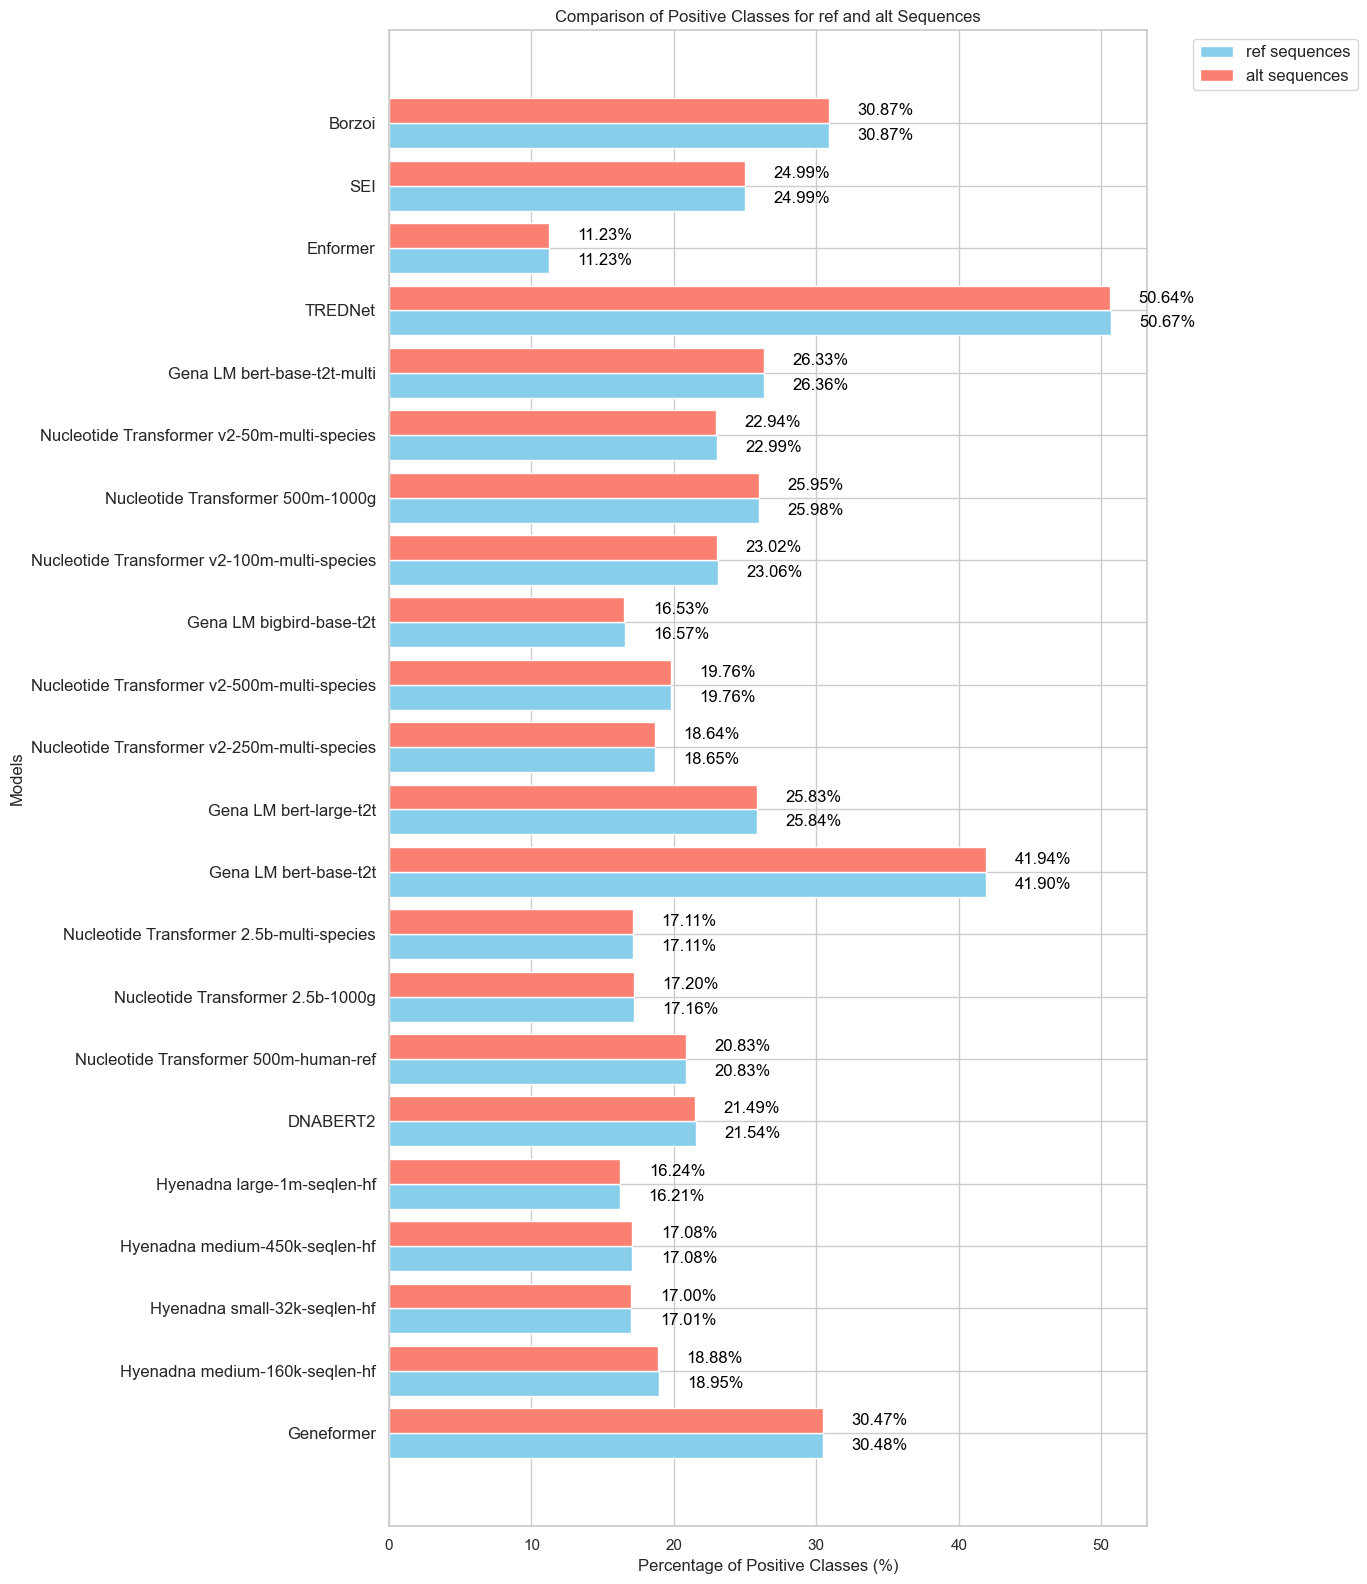

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dictionary with pre-calculated percentage values
model_data = models_ld_predictions

# Extract the pre-calculated percentage values for ref and alt
percentages_ref = [model_data[model]['ref'] * 100 for model in model_data]
percentages_alt = [model_data[model]['alt'] * 100 for model in model_data]

# Data for plotting
models = list(model_data.keys())

# Plotting
fig, ax = plt.subplots(figsize=(14, 16))

# Bar width
width = 0.4

# Create horizontal bar plot
y_pos = np.arange(len(models))
bars_ref = ax.barh(y_pos - width/2, percentages_ref, width, label='ref sequences', color='skyblue')
bars_alt = ax.barh(y_pos + width/2, percentages_alt, width, label='alt sequences', color='salmon')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Percentage of Positive Classes (%)')
ax.set_ylabel('Models')
ax.set_title('Comparison of Positive Classes for ref and alt Sequences')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)

# Display percentages above the bars
for bars in [bars_ref, bars_alt]:
    for bar in bars:
        width_value = bar.get_width()
        ax.text(width_value + 2, bar.get_y() + bar.get_height()/2, f'{width_value:.2f}%', 
                va='center', ha='left', color='black')

# Adding titles and labels
y_labels = [architecture_mapping_models[model] for model in df_sorted['Model'].values]
ax.set_yticks(range(len(y_labels)))  # Set positions for y-ticks
ax.set_yticklabels(y_labels, fontsize=12)
# Add legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [25]:
models_ld_predictions = {}
idx_ld_in_peak = df_ld_k27ac_causal[df_ld_k27ac_causal['in_peak']].index

for model in models_predictions.keys():
    if model not in models_ld_predictions:
        models_ld_predictions[model] = {'ref':0, 'alt':0, 'classes_ref':[], 'classes_alt':[]}
        
    if 'ref' in models_predictions[model]:
        logits = models_predictions[model]['ref'][idx_ld_in_peak].numpy()
        models_ld_predictions[model]['ref'] = np.argmax(logits, axis=1).sum()/len(logits) 
        models_ld_predictions[model]['classes_ref'] = np.argmax(logits, axis=1)
        logits = models_predictions[model]['alt'][idx_ld_in_peak].numpy()
        models_ld_predictions[model]['alt'] = np.argmax(logits, axis=1).sum()/len(logits)
        models_ld_predictions[model]['classes_alt'] = np.argmax(logits, axis=1)
    if 'predictions_alt' in models_predictions[model]:
        logits = models_predictions['trednet_ft_BioS73']['predictions_ref'][idx_ld_in_peak]
        threshold = 0.5001
        # Apply sigmoid function
        probabilities = 1 / (1 + np.exp(-logits))

        # Convert probabilities to class labels (threshold at 0.5)
        predicted_classes = (probabilities >= threshold).astype(int)
        
        models_ld_predictions[model]['ref'] = predicted_classes.sum()/len(predicted_classes)
        models_ld_predictions[model]['classes_ref'] = predicted_classes
        
        logits = models_predictions['trednet_ft_BioS73']['predictions_alt'][idx_ld_in_peak]
        # Apply sigmoid function
        probabilities = 1 / (1 + np.exp(-logits))

        # Convert probabilities to class labels (threshold at 0.5)
        predicted_classes = (probabilities >= threshold).astype(int)
        models_ld_predictions[model]['alt'] = predicted_classes.sum()/len(predicted_classes)
        models_ld_predictions[model]['classes_alt'] = predicted_classes
        
    if 'diff' in models_predictions[model]:
        logits_tmp = models_predictions[model]
        if isinstance(logits_tmp['diff'], list):
            logits_tmp['diff'] = np.array(logits_tmp['diff'])
            logits_tmp['diff_ratio'] = np.array(logits_tmp['diff_ratio'])

        
        
        logits = logits_tmp['diff']/(1-logits_tmp['diff_ratio'])
        logits = logits[idx_ld_in_peak]
        threshold = 0.5

        # Apply sigmoid function    
        probabilities = 1 / (1 + np.exp(-logits))

        # Convert probabilities to class labels (threshold at 0.5)
        predicted_classes = (probabilities >= threshold).astype(int)
        models_ld_predictions[model]['ref'] = predicted_classes.sum()/len(predicted_classes)
        models_ld_predictions[model]['classes_ref'] = predicted_classes
        

        logits = (logits_tmp['diff']*logits_tmp['diff_ratio'])/(1-logits_tmp['diff_ratio'])
        logits = logits[idx_ld_in_peak]
        # Apply sigmoid function
        probabilities = 1 / (1 + np.exp(-logits))
        # Convert probabilities to class labels (threshold at 0.5)
        predicted_classes = (probabilities >= threshold).astype(int)
        models_ld_predictions[model]['alt'] = predicted_classes.sum()/len(predicted_classes)
        
        
models_ld_predictions

NameError: name 'df_ld_k27ac_causal' is not defined

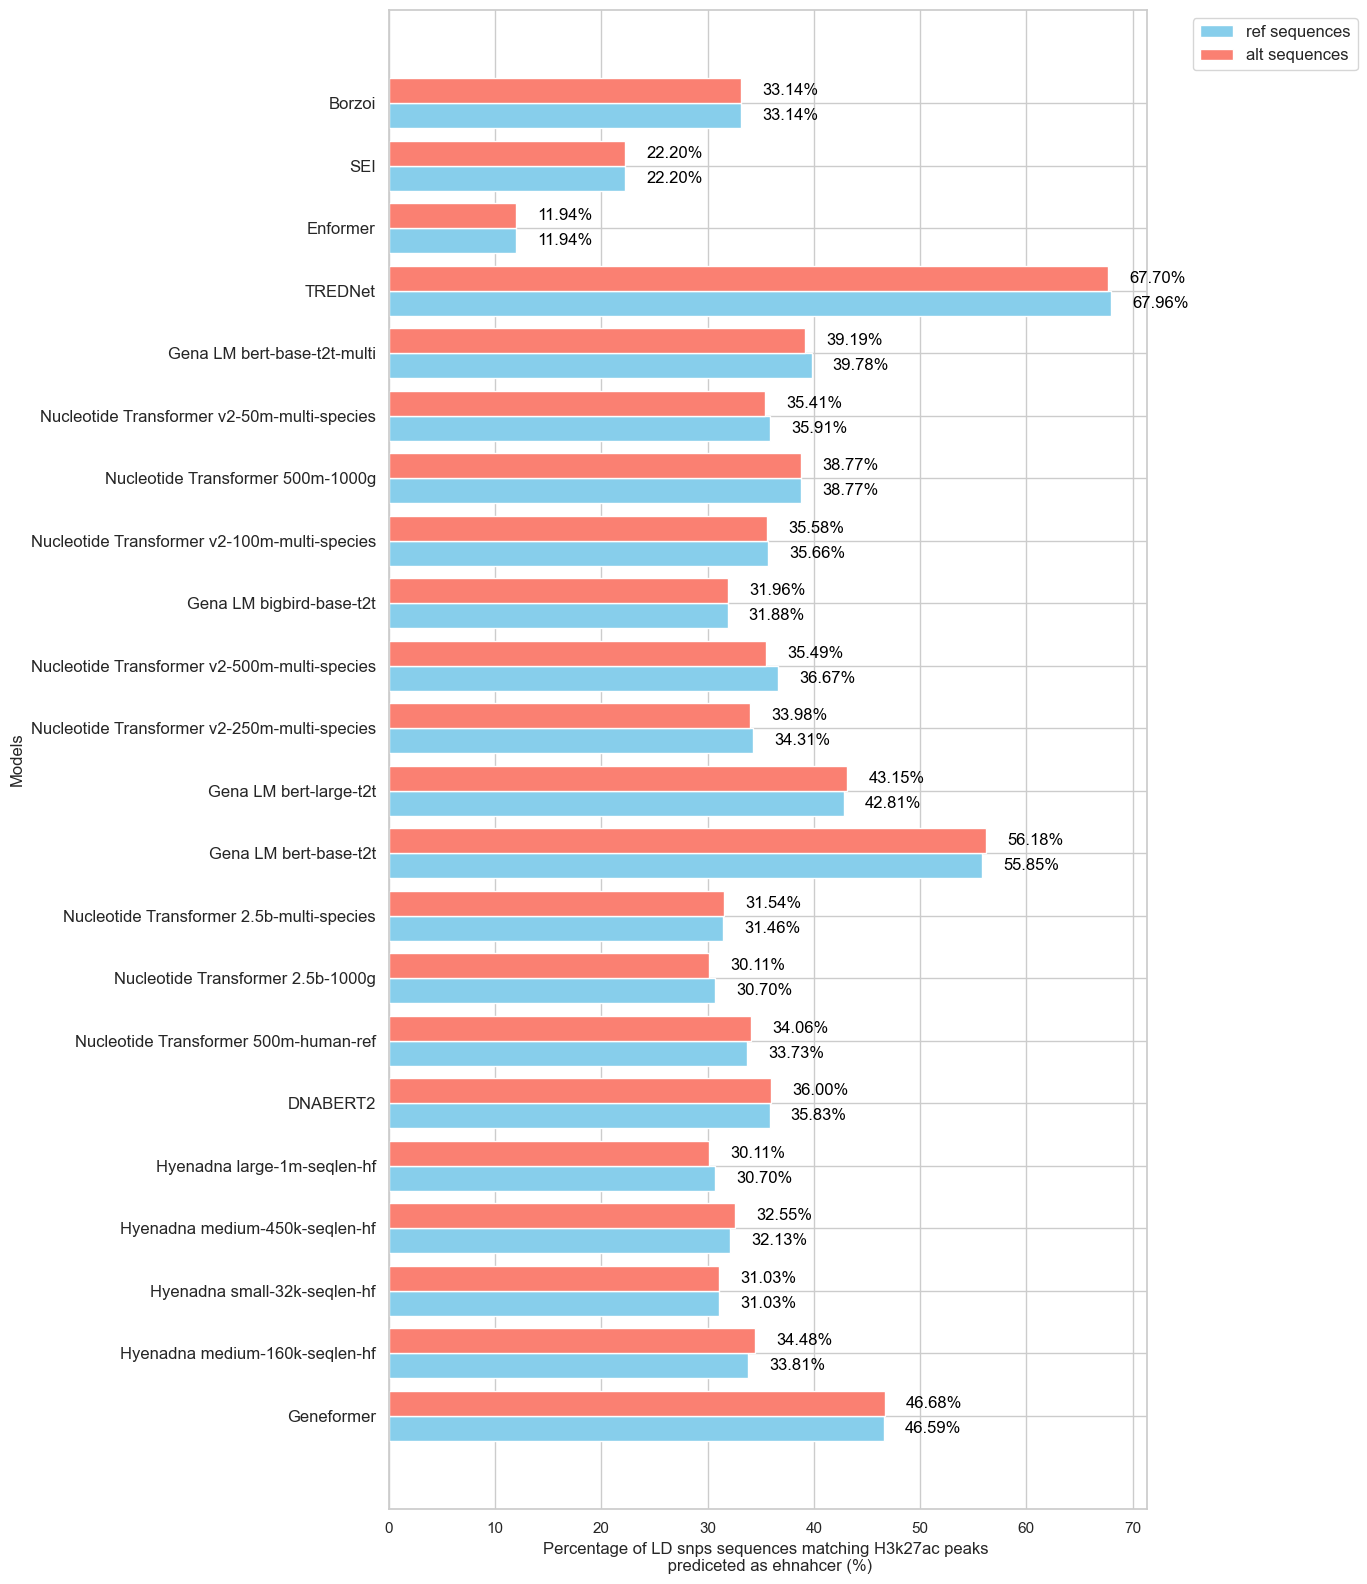

In [31]:
import numpy as np
import matplotlib.pyplot as plt

sns.set()

# Sample dictionary with pre-calculated percentage values
model_data = models_ld_predictions

# Extract the pre-calculated percentage values for ref and alt
percentages_ref = [model_data[model]['ref'] * 100 for model in model_data]
percentages_alt = [model_data[model]['alt'] * 100 for model in model_data]

# Data for plotting
models = list(model_data.keys())

# Plotting
fig, ax = plt.subplots(figsize=(14, 16))

# Bar width
width = 0.4

# Create horizontal bar plot
y_pos = np.arange(len(models))
bars_ref = ax.barh(y_pos - width/2, percentages_ref, width, label='ref sequences', color='skyblue')
bars_alt = ax.barh(y_pos + width/2, percentages_alt, width, label='alt sequences', color='salmon')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Percentage of LD snps sequences matching H3k27ac peaks \n prediceted as ehnahcer (%)')
ax.set_ylabel('Models')

ax.set_yticks(y_pos)
ax.set_yticklabels(models)

# Display percentages above the bars
for bars in [bars_ref, bars_alt]:
    for bar in bars:
        width_value = bar.get_width()
        ax.text(width_value + 2, bar.get_y() + bar.get_height()/2, f'{width_value:.2f}%', 
                va='center', ha='left', color='black')

# Adding titles and labels
y_labels = [architecture_mapping_models[model] for model in df_sorted['Model'].values]
ax.set_yticks(range(len(y_labels)))  # Set positions for y-ticks
ax.set_yticklabels(y_labels, fontsize=12)
# Add legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


### How many Causal SNPs match a h3k27ac peak

In [27]:
print(f'{len(k27ac_causal_snp)} k27ac causal snp over {len(causal_snp_position)}, {100*len(k27ac_causal_snp)/len(causal_snp_position):.2f}%')

553 k27ac causal snp over 10897, 5.07%


### How many LD SNPs of the Causal SNPs match a h3k27ac peak

In [28]:
df_ld_k27ac_causal = df_filtered[df_filtered['SNP_id_candidate'].isin(k27ac_causal_snp)]
df_ld_k27ac_list = []

for _, snp in df_ld_k27ac_causal.iterrows():
    chr = snp['Chromosome']
    pos = snp['Position']
    if intersection_bed_files(df_narrowpeak_k27ac, chrom=chr, snp_pos=pos):
        df_ld_k27ac_list.append(True)
    else:
        df_ld_k27ac_list.append(False)

df_ld_k27ac_causal['in_peak'] = df_ld_k27ac_list


/tmp/ipykernel_943182/3535006997.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ld_k27ac_causal['in_peak'] = df_ld_k27ac_list


In [29]:
print(f"{len(df_ld_k27ac_causal[df_ld_k27ac_causal['in_peak']])} LD k27ac snp over {len(df_ld_k27ac_causal)}, {100*len(df_ld_k27ac_causal[df_ld_k27ac_causal['in_peak']])/len(df_ld_k27ac_causal):.2f}%")


causal_snp_k27ac_unique = df_ld_k27ac_causal[df_ld_k27ac_causal['in_peak']]['SNP_id_candidate'].unique()

print(f"{len(causal_snp_k27ac_unique)} causal SNP with at least one LD snp")

print(f"Average number of LD snp per causal: {df_ld_k27ac_causal[df_ld_k27ac_causal['in_peak']]['SNP_id_candidate'].value_counts().mean():.2f}") 
print(f"Max number of LD snp per causal: {df_ld_k27ac_causal[df_ld_k27ac_causal['in_peak']]['SNP_id_candidate'].value_counts().max():.2f}") 

1189 LD k27ac snp over 10952, 10.86%
359 causal SNP with at least one LD snp
Average number of LD snp per causal: 3.31
Max number of LD snp per causal: 23.00


### Plot Top 3, 2, and 1 of the matching SNPs

#### evaluate tops

In [25]:
model_to_casual_snp = {}

for model_to_check in list(dict_results_per_experiment[0].keys()):
    top_1 = 0
    top_2 = 0
    top_3 = 0


    for cas_snp in causal_snp_k27ac_unique:
        df_tmp = df_ld_k27ac_causal[df_ld_k27ac_causal['SNP_id_candidate']==cas_snp].reset_index(drop=True)
        idx_ld = df_tmp[df_tmp['in_peak']].index
        associated_snps_log2 = snp_cand_dict[cas_snp][f'{model_to_check}_ft_BioS73']['log2_ratio']
        if isinstance(associated_snps_log2, (int, float, np.float32, np.float64)):
            ld_snp_value = [associated_snps_log2]
        else:
            ld_snp_value = associated_snps_log2[idx_ld]

        idx_causal = dataset_df[dataset_df['SNP_id']==cas_snp].index
        causal_snp_value = dict_results_per_experiment[1][model_to_check]['Value_Ratio_log2'][idx_causal]

        # Top checks
        value = causal_snp_value
        sorted_tmp = np.sort(ld_snp_value)


        if int(value >= sorted_tmp[-1] or value <= sorted_tmp[0]):
            top_1 = top_1 + 1
            top_2 = top_2 + 1
            top_3 = top_3 + 1
        elif len(sorted_tmp) > 2:
            if value >= sorted_tmp[-2] or value <= sorted_tmp[1]: 
                top_2 = top_2 + 1
                top_3 = top_3 + 1 
            elif len(sorted_tmp) > 3:
                top_3 = top_3 + int(value >= sorted_tmp[-3] or value <= sorted_tmp[2])


        
        if model_to_check not in model_to_casual_snp:
            model_to_casual_snp[model_to_check] = {'top_1': 0, 'top_2': 0, 'top_3': 0}

        model_to_casual_snp[model_to_check]['top_1'] = top_1 
        model_to_casual_snp[model_to_check]['top_2'] = top_2
        model_to_casual_snp[model_to_check]['top_3'] = top_3

#### plots

In [1]:
architecture_mapping_models = {
    'dnabert2': 'DNABERT2',
    'nucleotide-transformer-v2-50m-multi-species':  'Nucleotide Transformer v2-50m-multi-species',
    'nucleotide-transformer-v2-100m-multi-species': 'Nucleotide Transformer v2-100m-multi-species',
    'nucleotide-transformer-v2-250m-multi-species': 'Nucleotide Transformer v2-250m-multi-species',
    'nucleotide-transformer-v2-500m-multi-species': 'Nucleotide Transformer v2-500m-multi-species',
    'nucleotide-transformer-500m-1000g':            'Nucleotide Transformer 500m-1000g',
    'nucleotide-transformer-500m-human-ref':        'Nucleotide Transformer 500m-human-ref',
    'nucleotide-transformer-2.5b-1000g':            'Nucleotide Transformer 2.5b-1000g',
    'nucleotide-transformer-2.5b-multi-species':    'Nucleotide Transformer 2.5b-multi-species',
    'Geneformer': 'Geneformer',
    'gena-lm-bert-base-t2t':        'Gena LM bert-base-t2t',
    'gena-lm-bert-large-t2t':       'Gena LM bert-large-t2t',
    'gena-lm-bert-base-t2t-multi':  'Gena LM bert-base-t2t-multi',
    'gena-lm-bigbird-base-t2t':     'Gena LM bigbird-base-t2t',
    'hyenadna-small-32k-seqlen-hf':   'Hyenadna small-32k-seqlen-hf',
    'hyenadna-medium-160k-seqlen-hf': 'Hyenadna medium-160k-seqlen-hf',
    'hyenadna-medium-450k-seqlen-hf': 'Hyenadna medium-450k-seqlen-hf',
    'hyenadna-large-1m-seqlen-hf':    'Hyenadna large-1m-seqlen-hf',
    'trednet': 'TREDNet',
    'sei': 'SEI',
    'enformer': 'Enformer',
    'borzoi': 'Borzoi',
}

/tmp/ipykernel_757163/1581420596.py:88: FutureWarning: The provided callable <function sum at 0x155533fdcca0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_pivot = df.pivot_table(index='Model Name', columns='Metric', values='Percentage', aggfunc=np.sum).fillna(0)


nucleotide-transformer-2.5b-multi-species
gena-lm-bert-base-t2t
nucleotide-transformer-2.5b-1000g
hyenadna-small-32k-seqlen-hf
hyenadna-large-1m-seqlen-hf
gena-lm-bigbird-base-t2t
Geneformer
nucleotide-transformer-v2-500m-multi-species
nucleotide-transformer-v2-250m-multi-species
hyenadna-medium-160k-seqlen-hf
hyenadna-medium-450k-seqlen-hf
gena-lm-bert-large-t2t
gena-lm-bert-base-t2t-multi
nucleotide-transformer-500m-1000g
nucleotide-transformer-v2-50m-multi-species
nucleotide-transformer-v2-100m-multi-species
dnabert2
nucleotide-transformer-500m-human-ref
trednet
sei
enformer
borzoi


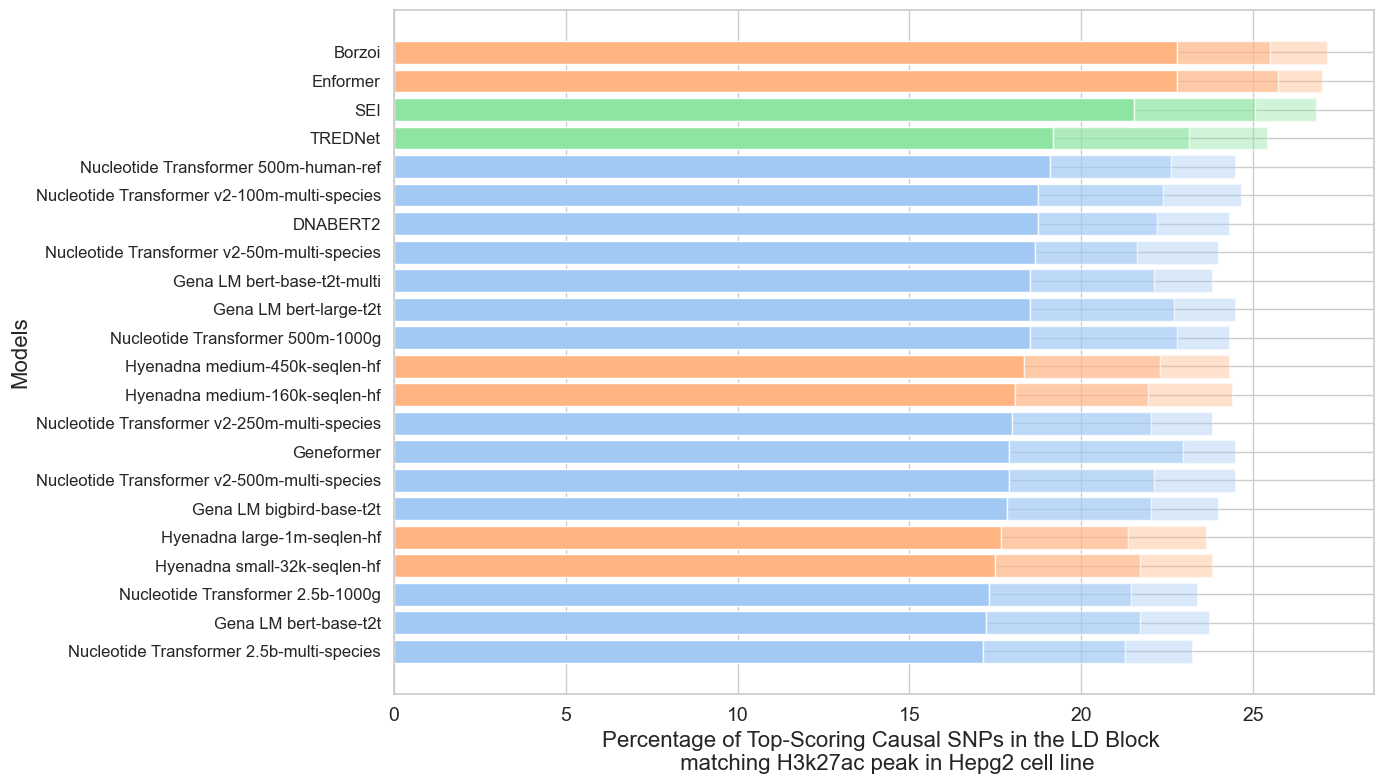

In [181]:
# Architecture mapping
architecture_mapping = {
    'dnabert2': 'Transformer',
    'nucleotide-transformer-v2-50m-multi-species': 'Transformer',
    'nucleotide-transformer-v2-100m-multi-species': 'Transformer',
    'nucleotide-transformer-v2-250m-multi-species': 'Transformer',
    'nucleotide-transformer-v2-500m-multi-species': 'Transformer',
    'nucleotide-transformer-500m-1000g': 'Transformer',
    'nucleotide-transformer-500m-human-ref': 'Transformer',
    'nucleotide-transformer-2.5b-1000g': 'Transformer',
    'nucleotide-transformer-2.5b-multi-species': 'Transformer',
    'Geneformer': 'Transformer',
    'gena-lm-bert-base-t2t': 'Transformer',
    'gena-lm-bert-large-t2t': 'Transformer',
    'gena-lm-bert-base-t2t-multi': 'Transformer',
    'gena-lm-bigbird-base-t2t': 'Transformer',
    'hyenadna-small-32k-seqlen-hf': 'Hybrid',
    'hyenadna-medium-160k-seqlen-hf': 'Hybrid',
    'hyenadna-medium-450k-seqlen-hf': 'Hybrid',
    'hyenadna-large-1m-seqlen-hf': 'Hybrid',
    'trednet': 'CNN',
    'sei': 'CNN',
    'enformer': 'Hybrid',
    'borzoi': 'Hybrid',
}

# Seaborn pastel color palette
palette = sns.color_palette("pastel", n_colors=len(set(architecture_mapping.values())))


# Color mapping based on architectures (using Set2 palette)
architecture_colors = {
    'Transformer': palette[0],  # First color for Transformer
    'Hybrid': palette[1],       # Second color for Hybrid
    'CNN': palette[2],          # Third color for CNN
}

# Normalize the values as percentage of the top value
data = model_to_casual_snp  # Assuming this contains model data

top_value = len(df_ld_k27ac_causal[df_ld_k27ac_causal['in_peak']])  # Assuming this is your dataset with causal SNP data
normalized_data = {
    model: {metric: (value[metric] / top_value) * 100 for metric in ['top_1', 'top_2', 'top_3']}
    for model, value in data.items()
}

# Convert the normalized data to a DataFrame
df = pd.DataFrame([
    {'Model': model, 'Metric': metric, 'Percentage': percentage, 'Architecture': architecture_mapping.get(model, 'Unknown')}
    for model, metrics in normalized_data.items()
    for metric, percentage in metrics.items()
])

# Architecture mapping for model names
architecture_mapping_models = {
    'dnabert2': 'DNABERT2',
    'nucleotide-transformer-v2-50m-multi-species':  'Nucleotide Transformer v2-50m-multi-species',
    'nucleotide-transformer-v2-100m-multi-species': 'Nucleotide Transformer v2-100m-multi-species',
    'nucleotide-transformer-v2-250m-multi-species': 'Nucleotide Transformer v2-250m-multi-species',
    'nucleotide-transformer-v2-500m-multi-species': 'Nucleotide Transformer v2-500m-multi-species',
    'nucleotide-transformer-500m-1000g':            'Nucleotide Transformer 500m-1000g',
    'nucleotide-transformer-500m-human-ref':        'Nucleotide Transformer 500m-human-ref',
    'nucleotide-transformer-2.5b-1000g':            'Nucleotide Transformer 2.5b-1000g',
    'nucleotide-transformer-2.5b-multi-species':    'Nucleotide Transformer 2.5b-multi-species',
    'Geneformer': 'Geneformer',
    'gena-lm-bert-base-t2t':        'Gena LM bert-base-t2t',
    'gena-lm-bert-large-t2t':       'Gena LM bert-large-t2t',
    'gena-lm-bert-base-t2t-multi':  'Gena LM bert-base-t2t-multi',
    'gena-lm-bigbird-base-t2t':     'Gena LM bigbird-base-t2t',
    'hyenadna-small-32k-seqlen-hf':   'Hyenadna small-32k-seqlen-hf',
    'hyenadna-medium-160k-seqlen-hf': 'Hyenadna medium-160k-seqlen-hf',
    'hyenadna-medium-450k-seqlen-hf': 'Hyenadna medium-450k-seqlen-hf',
    'hyenadna-large-1m-seqlen-hf':    'Hyenadna large-1m-seqlen-hf',
    'trednet': 'TREDNet',
    'sei': 'SEI',
    'enformer': 'Enformer',
    'borzoi': 'Borzoi',
}

# Add human-readable names for models (ensure architecture_mapping_models exists)
df['Model Name'] = df['Model']

# Sort the data by top_1 percentage for better comparison (ascending order)
df_sorted = df[df['Metric'] == 'top_1'].sort_values(by='Percentage', ascending=True)
order = df_sorted['Model'].tolist()

# Create a pivot table for stacked bars
df_pivot = df.pivot_table(index='Model Name', columns='Metric', values='Percentage', aggfunc=np.sum).fillna(0)


# Reorder the pivot table based on top_1 (ascending order)
df_pivot = df_pivot.loc[df_pivot['top_1'].sort_values(ascending=True).index]

# Create the plot with horizontal stacked bars
fig, ax = plt.subplots(figsize=(14, 8)) 

# Plot the bars with proper stacking
for i, model in enumerate(df_pivot.index):
    # Retrieve the architecture for the model from the pivoted DataFrame
    print(model)
    architecture = architecture_mapping.get(model, 'Unknown')
    
    # Get the color for top_1 based on the model architecture
    top_1_color = architecture_colors.get(architecture, '#000000')  # Default to black if not found
    


    # Plot top_1
    plt.barh(model, df_pivot.loc[model, 'top_1'], color=top_1_color, alpha = 1., label='Top 1' if i == 0 else "")
    
    # Plot top_2 - top_1
    plt.barh(model, df_pivot.loc[model, 'top_2'] - df_pivot.loc[model, 'top_1'], 
             left=df_pivot.loc[model, 'top_1'], color=top_1_color, alpha = 0.7, label='Top 2' if i == 0 else "")
    
    # Plot top_3 - top_2
    plt.barh(model, df_pivot.loc[model, 'top_3'] - df_pivot.loc[model, 'top_2'], 
             left=df_pivot.loc[model, 'top_2'], color=top_1_color, alpha = 0.4, label='Top 3' if i == 0 else "")

# Customize the appearance
plt.xlabel('Percentage of Top-Scoring Causal SNPs in the LD Block \n matching H3k27ac peak in Hepg2 cell line', fontsize=16)
plt.ylabel('Models', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Adding titles and labels
y_labels = [architecture_mapping_models[model] for model in df_sorted['Model'].values]
ax.set_yticks(range(len(y_labels)))  # Set positions for y-ticks
ax.set_yticklabels(y_labels, fontsize=12)

# Remove the legend
plt.legend().remove()



# Adjust layout to avoid clipping
plt.tight_layout()
plt.savefig('figure3.png', dpi=300)
# Show the plot
plt.show()


In [32]:
df_ld_k27ac_causal[df_ld_k27ac_causal['in_peak']]


,Chromosome,Position,Reference,Alternative,SNP_id,SNP_id_candidate,in_peak
2180,chr22,42915517,G,A,rs5751402,rs5758951,True
2189,chr22,42920139,G,A,rs8135794,rs5758951,True
2192,chr22,42912520,G,T,rs5759029,rs5758951,True
2195,chr22,42856274,A,G,rs5758990,rs5758951,True
2199,chr22,42807131,C,T,rs738535,rs5758951,True
...,...,...,...,...,...,...,...
238599,chr10,119317425,T,C,rs1105981,rs11599133,True
238602,chr10,119319480,C,T,rs4752289,rs11599133,True
238814,chr3,53235888,G,A,rs4687715,rs3773745,True
238884,chr1,202018300,A,G,rs61821547,rs80059802,True


In [41]:
## open a file like this: chr10	100038580	100038589	-4.76764	BioS11|DAS
file_path = "/data/Dcode/gaetano/repos/AI4Genomic/data/parsnars/output.DAS.fpr100enh.fpr01pnd.5bp.BioS11"  # Replace with the actual file path
df_nars = pd.read_csv(file_path, sep="\t", header=None, names=["Chromosome", "Start", "End", "Score", "Annotation"])

file_path = "/data/Dcode/gaetano/repos/AI4Genomic/data/parsnars/output.PAS.fpr100enh.fpr01pnd.5bp.BioS11"  # Replace with the actual file path
df_pars = pd.read_csv(file_path, sep="\t", header=None, names=["Chromosome", "Start", "End", "Score", "Annotation"])

print(df.head())  # Display the first few rows


  Chromosome      Start        End    Score  Annotation
0      chr10  100038580  100038589 -4.76764  BioS11|DAS
1      chr10  100038710  100038716 -4.10298  BioS11|DAS
2      chr10  100095226  100095234 -5.38212  BioS11|DAS
3      chr10  100095244  100095254 -4.16042  BioS11|DAS
4      chr10  100095319  100095326 -4.35378  BioS11|DAS


In [43]:
# Function to check if a position falls in any interval
def check_position_in_intervals(snps, intervals_pars, intervals_nars):
    snps["in_interval_pars"] = False  # Default value
    snps["in_interval_nars"] = False
    
    for i, snp in snps.iterrows():
        in_interval = (
            (intervals_pars["Chromosome"] == snp["Chromosome"]) &
            (intervals_pars["Start"] <= snp["Position"]) &
            (intervals_pars["End"] >= snp["Position"])
        ).any()
        
        snps.at[i, "in_interval_pars"] = in_interval  # Update the column
        
        in_interval = (
            (intervals_nars["Chromosome"] == snp["Chromosome"]) &
            (intervals_nars["Start"] <= snp["Position"]) &
            (intervals_nars["End"] >= snp["Position"])
        ).any()
        
        snps.at[i, "in_interval_nars"] = in_interval  # Update the column

    return snps

# Run the check
snps = check_position_in_intervals(df_ld_k27ac_causal[df_ld_k27ac_causal['in_peak']], df_pars, df_nars)

# Print results
print(snps)


/tmp/ipykernel_943182/767260040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snps["in_interval_pars"] = False  # Default value
/tmp/ipykernel_943182/767260040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snps["in_interval_nars"] = False


       Chromosome   Position Reference Alternative      SNP_id  \
2180        chr22   42915517         G           A   rs5751402   
2189        chr22   42920139         G           A   rs8135794   
2192        chr22   42912520         G           T   rs5759029   
2195        chr22   42856274         A           G   rs5758990   
2199        chr22   42807131         C           T    rs738535   
...           ...        ...       ...         ...         ...   
238599      chr10  119317425         T           C   rs1105981   
238602      chr10  119319480         C           T   rs4752289   
238814       chr3   53235888         G           A   rs4687715   
238884       chr1  202018300         A           G  rs61821547   
238886       chr1  202018252         T           C  rs35247600   

       SNP_id_candidate  in_peak  in_interval_pars  in_interval_nars  
2180          rs5758951     True             False             False  
2189          rs5758951     True             False             Fa

In [44]:
snps[snps['in_interval_pars']]

,Chromosome,Position,Reference,Alternative,SNP_id,SNP_id_candidate,in_peak,in_interval_pars,in_interval_nars
3611,chr11,22680851,G,C,rs7125750,rs2928345,True,True,False
7572,chr6,111593622,G,A,rs174384,rs174386,True,True,False
19359,chr6,111593622,G,A,rs174384,rs174385,True,True,False
23505,chr12,93663521,C,T,rs79511404,rs77316360,True,True,False
62998,chr4,6733691,G,T,rs76553165,rs79642303,True,True,False
89615,chr8,8288704,G,A,rs939074,rs2955552,True,True,False
192732,chr14,94594060,T,C,rs2854943,rs72694966,True,True,False
214882,chr11,27312350,G,C,rs10742175,rs10767630,True,True,False
232202,chr11,22680851,G,C,rs7125750,rs1121196,True,True,False


In [45]:
snps[snps['in_interval_nars']]

,Chromosome,Position,Reference,Alternative,SNP_id,SNP_id_candidate,in_peak,in_interval_pars,in_interval_nars
3259,chr11,22680792,A,G,rs2928345,rs7125750,True,False,True
32676,chr11,116339416,C,T,rs10736484,rs4938263,True,False,True
34766,chr11,116339416,C,T,rs10736484,rs10736485,True,False,True
162365,chr4,6922316,T,G,rs6446551,rs61488923,True,False,True
201624,chr18,3649963,C,T,rs1639364,rs1791371,True,False,True
232193,chr11,22680792,A,G,rs2928345,rs1121196,True,False,True


## Extra

### plots

Loaded DataFrame:
  Chromosome      Start        End        Name  Score Strand  SignalValue  \
0      chr10  100005828  100006246  Peak_67702     12      .      3.63019   
1      chr10  100009273  100009655  Peak_27518     22      .      7.78643   
2      chr10  100038053  100039830  Peak_10420     69      .     18.08505   
3      chr10  100080967  100082211  Peak_17727     38      .     12.05081   
4      chr10  100095102  100095563  Peak_48111     14      .      4.64480   

     pValue    qValue  Peak  
0   4.27906   2.42468   265  
1  13.37992  11.21485   227  
2  54.50574  51.74897   563  
3  27.24070  24.82194   814  
4   6.17626   4.22877   327  


/data/Dcode/gaetano/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


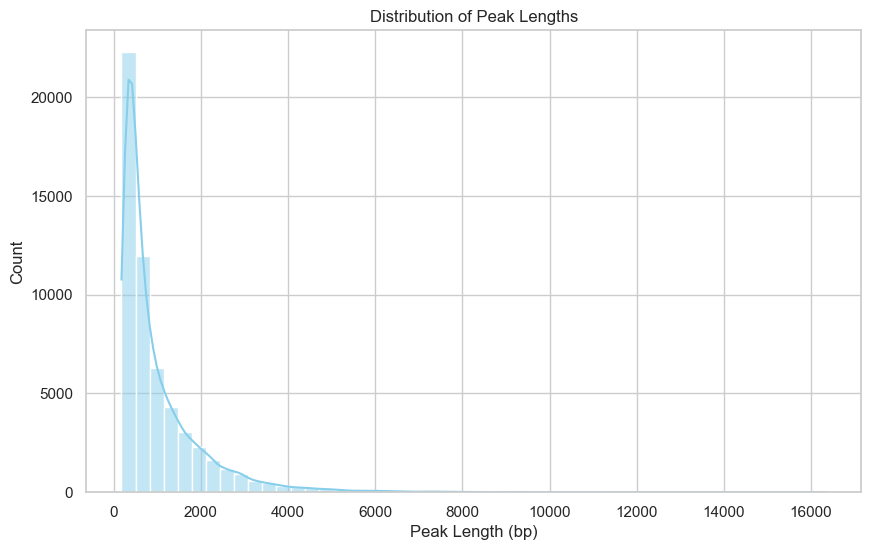

/data/Dcode/gaetano/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


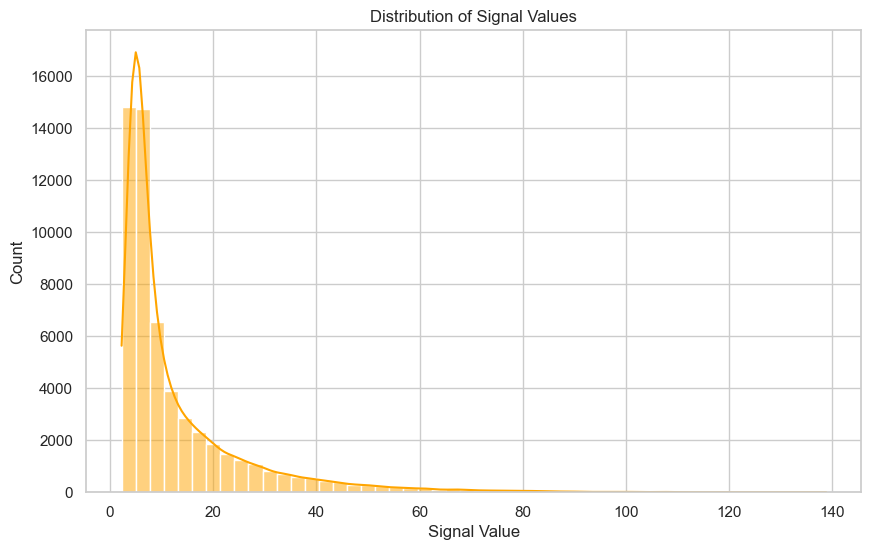

/data/Dcode/gaetano/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/Dcode/gaetano/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


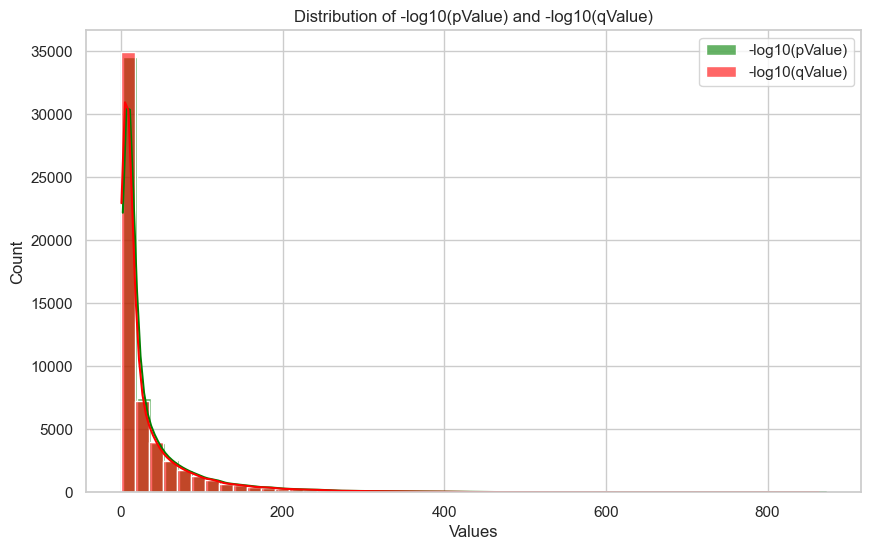

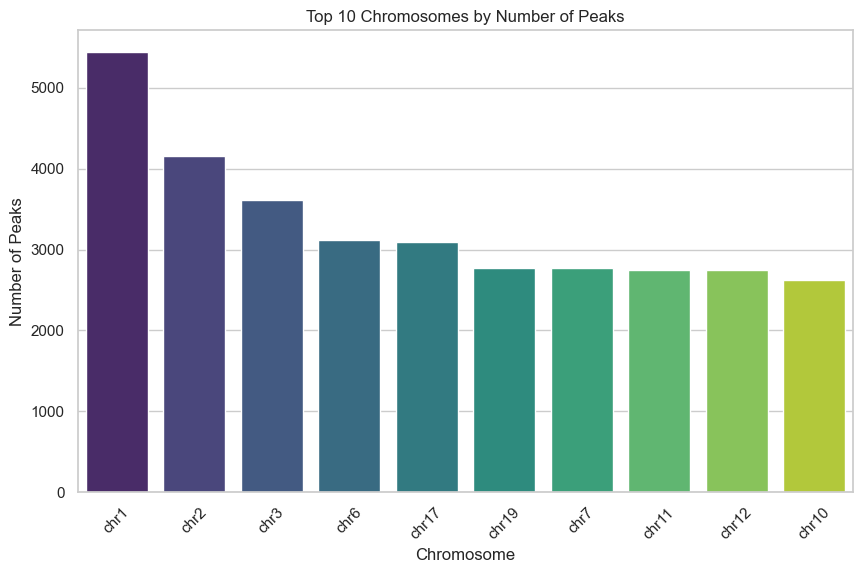

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Load narrowPeak file into a DataFrame
def load_narrowpeak(file_path):
    """
    Reads a narrowPeak BED file and returns a pandas DataFrame.
    """
    column_names = [
        "Chromosome", "Start", "End", "Name", "Score", "Strand",
        "SignalValue", "pValue", "qValue", "Peak"
    ]
    df = pd.read_csv(file_path, sep="\t", header=None, names=column_names)
    return df

# Plot the data
def plot_narrowpeak(df):
    """
    Plots key statistics from the narrowPeak DataFrame.
    """
    # Add 'Length' column
    df["Length"] = df["End"] - df["Start"]
    
    # 1. Plot distribution of peak lengths
    plt.figure(figsize=(10, 6))
    sns.histplot(df["Length"], bins=50, color="skyblue", kde=True)
    plt.title("Distribution of Peak Lengths")
    plt.xlabel("Peak Length (bp)")
    plt.ylabel("Count")
    plt.show()
    
    # 2. Plot distribution of Signal Value
    plt.figure(figsize=(10, 6))
    sns.histplot(df["SignalValue"], bins=50, color="orange", kde=True)
    plt.title("Distribution of Signal Values")
    plt.xlabel("Signal Value")
    plt.ylabel("Count")
    plt.show()
    
    # 3. Plot distribution of -log10(pValue) and -log10(qValue)
    plt.figure(figsize=(10, 6))
    sns.histplot(df["pValue"], bins=50, color="green", kde=True, label="-log10(pValue)", alpha=0.6)
    sns.histplot(df["qValue"], bins=50, color="red", kde=True, label="-log10(qValue)", alpha=0.6)
    plt.title("Distribution of -log10(pValue) and -log10(qValue)")
    plt.xlabel("Values")
    plt.ylabel("Count")
    plt.legend()
    plt.show()
    
    # 4. Top 10 chromosomes by number of peaks
    plt.figure(figsize=(10, 6))
    chromosome_counts = df["Chromosome"].value_counts().head(10)
    sns.barplot(x=chromosome_counts.index, y=chromosome_counts.values, palette="viridis")
    plt.title("Top 10 Chromosomes by Number of Peaks")
    plt.xlabel("Chromosome")
    plt.ylabel("Number of Peaks")
    plt.xticks(rotation=45)
    plt.show()

# File path to the narrowPeak file
file_path = "/data/Dcode/gaetano/repos/AI4Genomic/data/h3k27ac/hepg2_hg38/ENCFF886SZT.bed"

# Run the functions
df_narrowpeak = load_narrowpeak(file_path)
print("Loaded DataFrame:")
print(df_narrowpeak.head())

plot_narrowpeak(df_narrowpeak)


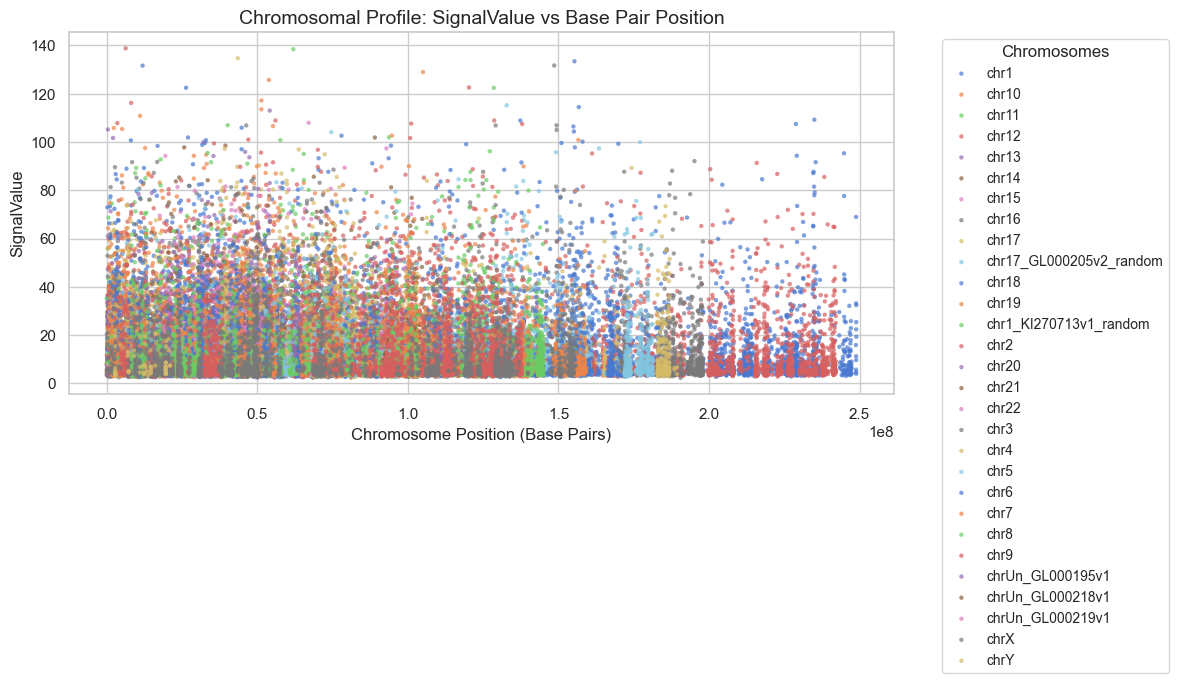

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Load narrowPeak file into a DataFrame
def load_narrowpeak(file_path):
    """
    Reads a narrowPeak BED file and returns a pandas DataFrame.
    """
    column_names = [
        "Chromosome", "Start", "End", "Name", "Score", "Strand",
        "SignalValue", "pValue", "qValue", "Peak"
    ]
    df = pd.read_csv(file_path, sep="\t", header=None, names=column_names)
    return df

# Plot chromosomal profile
def plot_chromosomal_profile(df, value_column="SignalValue"):
    """
    Plots a chromosomal profile where x-axis represents base pairs from chr1 to chrX
    and y-axis represents the peak value (SignalValue or Score).
    """
    # Sort by Chromosome and Start position
    df_sorted = df.sort_values(by=["Chromosome", "Start"])

    # Create a new figure
    plt.figure(figsize=(12, 6))

    # Convert Chromosome to categorical ordering to plot in correct order
    chrom_order = sorted(df_sorted["Chromosome"].unique(), key=lambda x: (x[3:], x))  # Sorting chromosomes as chr1, chr2, ..., chrX

    # Plot each chromosome's peaks
    for chrom in chrom_order:
        chrom_data = df_sorted[df_sorted["Chromosome"] == chrom]
        
        # Plot each peak in the chromosome
        plt.scatter(
            chrom_data["Start"], chrom_data[value_column], 
            s=10, label=f"{chrom}", alpha=0.7, edgecolors="none"
        )
        
        # Optionally, you can plot as a line plot instead of scatter by using:
        # plt.plot(chrom_data["Start"], chrom_data[value_column], label=f"{chrom}", alpha=0.7)

    # Customize plot
    plt.title(f"Chromosomal Profile: {value_column} vs Base Pair Position", fontsize=14)
    plt.xlabel("Chromosome Position (Base Pairs)", fontsize=12)
    plt.ylabel(value_column, fontsize=12)
    plt.legend(title="Chromosomes", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
    plt.tight_layout()
    plt.show()

# File path to the narrowPeak file
file_path = "/data/Dcode/gaetano/repos/AI4Genomic/data/h3k27ac/hepg2_hg38/ENCFF886SZT.bed"

# Load and plot the data
df_narrowpeak = load_narrowpeak(file_path)
plot_chromosomal_profile(df_narrowpeak, value_column="SignalValue")


/data/Dcode/gaetano/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/Dcode/gaetano/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/Dcode/gaetano/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


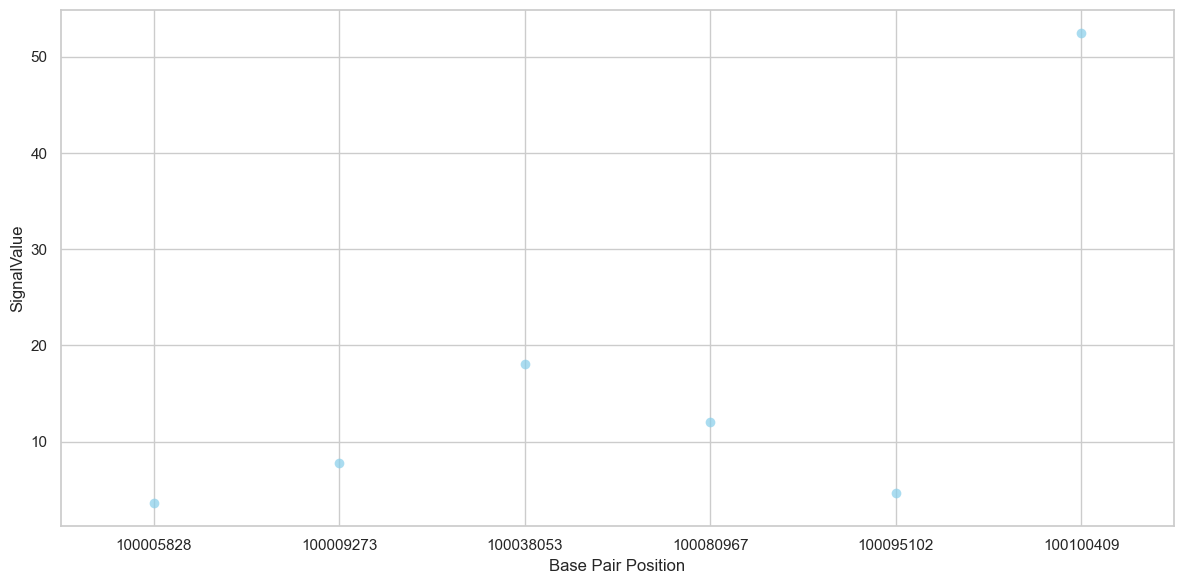

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

# Load narrowPeak file into a DataFrame
def load_narrowpeak(file_path):
    """
    Reads a narrowPeak BED file and returns a pandas DataFrame.
    """
    column_names = [
        "Chromosome", "Start", "End", "Name", "Score", "Strand",
        "SignalValue", "pValue", "qValue", "Peak"
    ]
    df = pd.read_csv(file_path, sep="\t", header=None, names=column_names)
    return df

# Plot chromosomal profile for a specific 2kbp region as a strip plot
def plot_kbp_region_stripplot(df, chrom="chr1", start_bp=1000000, end_bp=1002000, value_column="SignalValue"):
    """
    Plots a chromosomal profile for a specific 2kbp region as a strip plot.
    """
    # Filter data for the specified chromosome and region
    df_filtered = df[(df["Chromosome"] == chrom) & 
                     (df["Start"] >= start_bp) &
                     (df["End"] <= end_bp)]
    
    if df_filtered.empty:
        print(f"No peaks found in the specified 2kbp region for {chrom}.")
        return

    # Create a new figure
    plt.figure(figsize=(12, 6))

    # Plot the data as a strip plot
    sns.stripplot(
        x="Start", 
        y=value_column, 
        data=df_filtered, 
        color="skyblue", 
        size=7,  # Controls the size of the dots
        jitter=True,  # Adds some random jitter to make the dots more distinguishable
        alpha=0.7  # Transparency of the dots
    )

    # Customize plot
    plt.xlabel("Base Pair Position", fontsize=12)
    plt.ylabel(value_column, fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# File path to the narrowPeak file
file_path = "/data/Dcode/gaetano/repos/AI4Genomic/data/h3k27ac/hepg2_hg38/ENCFF886SZT.bed"

# Load the DataFrame
df_narrowpeak = load_narrowpeak(file_path)

# Plot for a specific 2kbp region on chromosome 10 (e.g., from 100005828 to 100006246)
plot_kbp_region_stripplot(df_narrowpeak, chrom="chr10", start_bp=100005828, end_bp=100101693, value_column="SignalValue")


/data/Dcode/gaetano/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/Dcode/gaetano/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/Dcode/gaetano/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


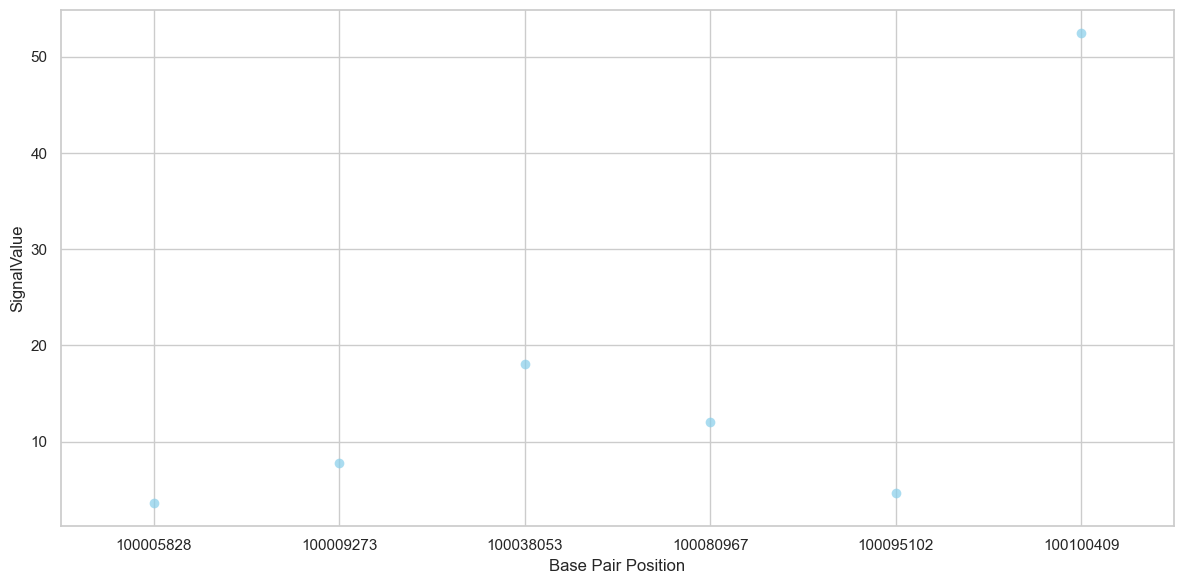

In [ ]:
# Plot for a specific 2kbp region on chromosome 10 (e.g., from 100005828 to 100006246)
plot_kbp_region_stripplot(df_narrowpeak, chrom="chr10", start_bp=100005828, end_bp=100101693, value_column="SignalValue")